In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dosya Okuma

In [391]:
oasis = pd.read_csv("oasis.csv")

In [392]:
### Group -------> Demented, Non-demented veya Converted sÄ±nÄ±flarÄ±
### Visit -------> HastanÄ±n Ziyaret SayÄ±sÄ±
### MR Delay ----> Delay Magnetic Resonance(MR) gecikmesi, gÃ¶rÃ¼ntÃ¼ alÄ±mÄ± yapÄ±lmadan Ã¶nce verilen gecikme sÃ¼resi
### M/F ---------> HastanÄ±n Cinsiyeti
### Age ---------> HastanÄ±n Tarama SÄ±rasÄ±ndaki YaÅŸÄ±
### EDUC --------> HastanÄ±n EÄŸitim HayatÄ±(yÄ±l)
### SES ---------> HastanÄ±n Sosyo Ekonomik Durumu (1-5)
### MMSE --------> Mini Mental Durum Testi PuanÄ±
### CDR ---------> Klinik Demans Derecelendirmesi
### eTIV --------> Deneysel Toplam Kafa Ä°Ã§i Hacmi
### nWBV --------> Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi
### ASF ---------> Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼

### Parametre olarak alÄ±nmayanlar;
### Subject ID --> HastanÄ±n kimlik numarasÄ±
### MR ID -------> Her hastanÄ±n MR kimlik numarasÄ±
### Hand --------> SaÄŸ el yada Sol el kullanma alÄ±ÅŸkanlÄ±ÄŸÄ± (tÃ¼m Ã¶rnekler SaÄŸ el kullanmaktadÄ±r)

############### Mini Mental Durum Testi PuanÄ± ###############
###  MMSE      Demans Skoru                               ###
### 25-30 --> SaÄŸlÄ±klÄ± (Demans DeÄŸil)                     ###
### 21-24 --> Erken aÅŸama Alzheimer (Very Mild Alzheimer) ###
### 10-20 --> Orta aÅŸama Alzheimer (Mild Alzheimer)       ###
###  0-10 --> Ä°leri aÅŸama (Modarate Alzheimer)            ###
#############################################################

############## Klinik Demans Derecelendirmesi ###############
### CDR      Demans Skoru                                 ###
###  0  --> SaÄŸlÄ±klÄ± (Demans DeÄŸil)                       ###
### 0,5 --> Erken aÅŸama Alzheimer (Very Mild Alzheimer)   ###
###  1  --> Orta aÅŸama Alzheimer (Mild Alzheimer)         ###
###  2  --> Ä°leri aÅŸama (Modarate Alzheimer)              ###
###  3  --> Åžiddetli (Son) aÅŸama (Severe Alzheimer)       ###
#############################################################

In [393]:
print(oasis)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [394]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

# Veri Analizi

In [395]:
# Analiz
oasis.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

In [396]:
# Veri FarklÄ±lÄ±klarÄ±
# Ne kadar farklÄ± deÄŸer var

for i in list(oasis.columns):
    print(f"{i} -> {oasis[i].value_counts().shape[0]}")

Subject ID -> 150
MRI ID -> 373
Group -> 3
Visit -> 5
MR Delay -> 201
M/F -> 2
Hand -> 1
Age -> 39
EDUC -> 12
SES -> 5
MMSE -> 18
CDR -> 4
eTIV -> 286
nWBV -> 136
ASF -> 265


In [397]:
# Null DeÄŸerler
# Ne kadar null deÄŸer var
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## Null iÅŸlemler

In [398]:
# Veri setinin ilk 15 deÄŸerini yaz
oasis.head(15)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2   OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3   OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4   OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
10  OAS2_0007  OAS2_0007_MR1     Demented      1         0   M    R   71   
11  OAS2_0007  OAS2_0007_MR3     Demented      3       518   M    R   73   
12  OAS2_0007  OAS2_0007_MR4     Demented      4      1281   M    R   75   
13  OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14  OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0  0.0  1987  0.696  0.883  
1     14  2.0  30.0  0.0  2004  0.681  0.876  
2     12  NaN  23.0  0.5  1678  0.736  1.046  
3     12  NaN  28.0  0.5  1738  0.713  1.010  
4     12  NaN  22.0  0.5  1698  0.701  1.034  
5     18  3.0  28.0  0.0  1215  0.710  1.444  
6     18  3.0  27.0  0.0  1200  0.718  1.462  
7     12  4.0  28.0  0.0  1689  0.712  1.039  
8     12  4.0  29.0  0.5  1701  0.711  1.032  
9     12  4.0  30.0  0.0  1699  0.705  1.033  
10    16  NaN  28.0  0.5  1357  0.748  1.293  
11    16  NaN  27.0  1.0  1365  0.727  1.286  
12    16  NaN  27.0  1.0  1372  0.710  1.279  
13    14  2.0  30.0  0.0  1272  0.698  1.380  
14    14  2.0  29.0  0.0  1257  0.703  1.396

In [399]:
# Null kayÄ±tlarÄ± dropla ve ilk 15 deÄŸerini yaz
oasis.dropna().head(15)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
13  OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14  OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   
15  OAS2_0009  OAS2_0009_MR1     Demented      1         0   M    R   68   
16  OAS2_0009  OAS2_0009_MR2     Demented      2       576   M    R   69   
17  OAS2_0010  OAS2_0010_MR1     Demented      1         0   F    R   66   
18  OAS2_0010  OAS2_0010_MR2     Demented      2       854   F    R   68   
19  OAS2_0012  OAS2_0012_MR1  Nondemented      1         0   F    R   78   
20  OAS2_0012  OAS2_0012_MR2  Nondemented      2       730   F    R   80   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0  0.0  1987  0.696  0.883  
1     14  2.0  30.0  0.0  2004  0.681  0.876  
5     18  3.0  28.0  0.0  1215  0.710  1.444  
6     18  3.0  27.0  0.0  1200  0.718  1.462  
7     12  4.0  28.0  0.0  1689  0.712  1.039  
8     12  4.0  29.0  0.5  1701  0.711  1.032  
9     12  4.0  30.0  0.0  1699  0.705  1.033  
13    14  2.0  30.0  0.0  1272  0.698  1.380  
14    14  2.0  29.0  0.0  1257  0.703  1.396  
15    12  2.0  27.0  0.5  1457  0.806  1.205  
16    12  2.0  24.0  0.5  1480  0.791  1.186  
17    12  3.0  30.0  0.5  1447  0.769  1.213  
18    12  3.0  29.0  0.5  1482  0.752  1.184  
19    16  2.0  29.0  0.0  1333  0.748  1.316  
20    16  2.0  29.0  0.0  1323  0.738  1.326

In [400]:
# Ne kadar null deÄŸer var?
# SES ve MMSE de null deÄŸerler varmÄ±ÅŸ
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [401]:
# SES ve MMSE sÃ¼tunlarÄ±ndaki eksik (NaN) Null deÄŸerleri, her bir sÃ¼tunun ortalamasÄ± ile doldur
oasis_filled = oasis.fillna({
    "SES": oasis["SES"].mean(),    # SES sÃ¼tunu iÃ§in ortalama deÄŸerle doldur
    "MMSE": oasis["MMSE"].mean()   # MMSE sÃ¼tunu iÃ§in ortalama deÄŸerle doldur
})

In [402]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [403]:
# GÃ¼ncellenmiÅŸ (eksikleri doldurulmuÅŸ) veriyi "oasisUpdateNull.csv" adlÄ± yeni bir dosyaya kaydet
# index=False yazarak DataFrame'in satÄ±r numaralarÄ±nÄ±n (index) dosyaya yazÄ±lmasÄ±nÄ± engelliyoruz
oasis_filled.to_csv("oasisUpdateNull.csv", index=False)

# ArtÄ±k eksik verileri doldurulmuÅŸ olan CSV dosyasÄ±nÄ± yeniden okuyoruz ve oasis deÄŸiÅŸkenine atÄ±yoruz
# Bu sayede sonraki iÅŸlemlerimizi temiz veri Ã¼zerinden gerÃ§ekleÅŸtirebiliriz
oasis = pd.read_csv("oasisUpdateNull.csv")
print("\nâœ… Null deÄŸerler iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateNull.csv' dosyasÄ±na kaydedildi.")


âœ… Null deÄŸerler iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateNull.csv' dosyasÄ±na kaydedildi.


In [404]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  27.0  0.0  1987  0.696  0.883  
1      14  2.000000  30.0  0.0  2004  0.681  0.876  
2      12  2.460452  23.0  0.5  1678  0.736  1.046  
3      12  2.460452  28.0  0.5  1738  0.713  1.010  
4      12  2.460452  22.0  0.5  1698  0.701  1.034  
..    ...       ...   ...  ...   ...    ...    ...  
368    16  1.000000  28.0  0.5  1693  0.694  1.037  
369    16  1.000000  26.0  0.5  1688  0.675  1.040  
370    13  2.000000  30.0  0.0  1319  0.801  1.331  
371    13  2.000000  30.0  0.0  1327  0.796  1.323  
372    13  2.000000  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [405]:
# Ne kadar null deÄŸer var? Kontrol edelim
# Null deÄŸer 
oasis.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## AykÄ±rÄ± DeÄŸerler

In [406]:
# Veri tiplerini kontrol et
print(oasis.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


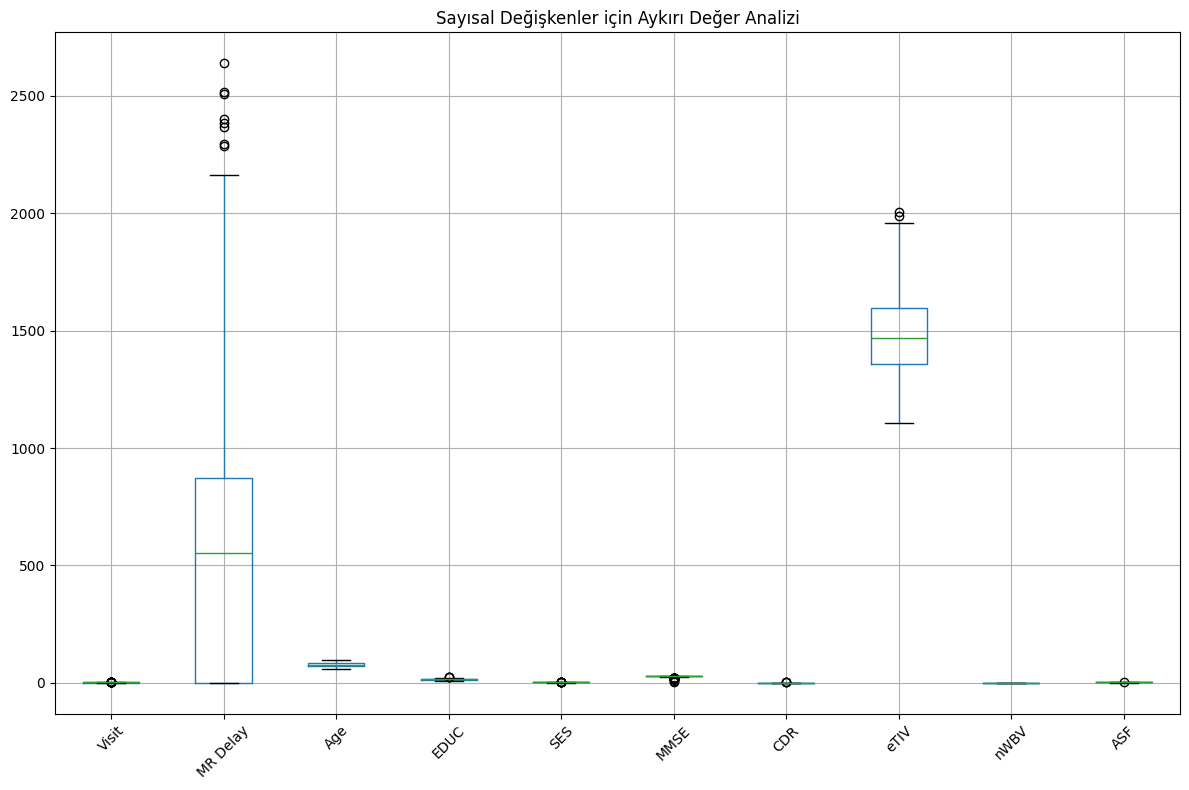

In [407]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

In [409]:
# TemizlenmiÅŸ (null deÄŸeri olmayan) veriyi oku
oasis = pd.read_csv("oasisUpdateNull.csv")

# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Her sayÄ±sal sÃ¼tun iÃ§in aykÄ±rÄ± deÄŸer kontrolÃ¼ ve dÃ¼zeltme iÅŸlemi
for col in numeric_columns:
    # 1. ve 3. Ã§eyrekleri hesapla
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Alt ve Ã¼st sÄ±nÄ±rlarÄ± belirle
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # AykÄ±rÄ± deÄŸerleri bul (sÄ±nÄ±rlarÄ±n dÄ±ÅŸÄ±nda kalanlar)
    outliers = oasis[(oasis[col] < lower_limit) | (oasis[col] > upper_limit)][col]

    # EÄŸer aykÄ±rÄ± deÄŸer varsa, bilgi yazdÄ±r
    if len(outliers) > 0:
        print(f"\nðŸ“Š {col} sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:")
        print(f"   - Alt sÄ±nÄ±r: {lower_limit:.2f}")
        print(f"   - Ãœst sÄ±nÄ±r: {upper_limit:.2f}")
        print(f"   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: {len(outliers)}")
        print(f"   - Ä°lk 5 aykÄ±rÄ± deÄŸer:")
        print(outliers.head())

    # AykÄ±rÄ± deÄŸerleri alt/Ã¼st sÄ±nÄ±rlarla deÄŸiÅŸtir
    oasis[col] = oasis[col].apply(
        lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x)
    )

# AykÄ±rÄ± deÄŸerleri dÃ¼zeltilmiÅŸ veriyi yeni dosyaya kaydet
oasis.to_csv("oasisUpdateAykiri.csv", index=False)

# GÃ¼ncellenmiÅŸ veriyi tekrar oku
oasis = pd.read_csv("oasisUpdateAykiri.csv")

print("\nâœ… AykÄ±rÄ± deÄŸer iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateAykiri.csv' dosyasÄ±na kaydedildi.")


ðŸ“Š Visit sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: -0.50
   - Ãœst sÄ±nÄ±r: 3.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 21
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
12    4
31    4
32    5
35    4
50    4
Name: Visit, dtype: int64

ðŸ“Š MR Delay sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: -1309.50
   - Ãœst sÄ±nÄ±r: 2182.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 8
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
32     2400
71     2369
75     2508
153    2386
159    2288
Name: MR Delay, dtype: int64

ðŸ“Š EDUC sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 6.00
   - Ãœst sÄ±nÄ±r: 22.00
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 3
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
107    23
108    23
109    23
Name: EDUC, dtype: int64

ðŸ“Š SES sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 0.50
   - Ãœst sÄ±nÄ±r: 4.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 7
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
136    5.0
137    5.0
138    5.0
161    5.0
162    5.0
Name: SES, dtype: float64

ðŸ“Š MMSE sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 22.50
   - Ãœst sÄ±nÄ

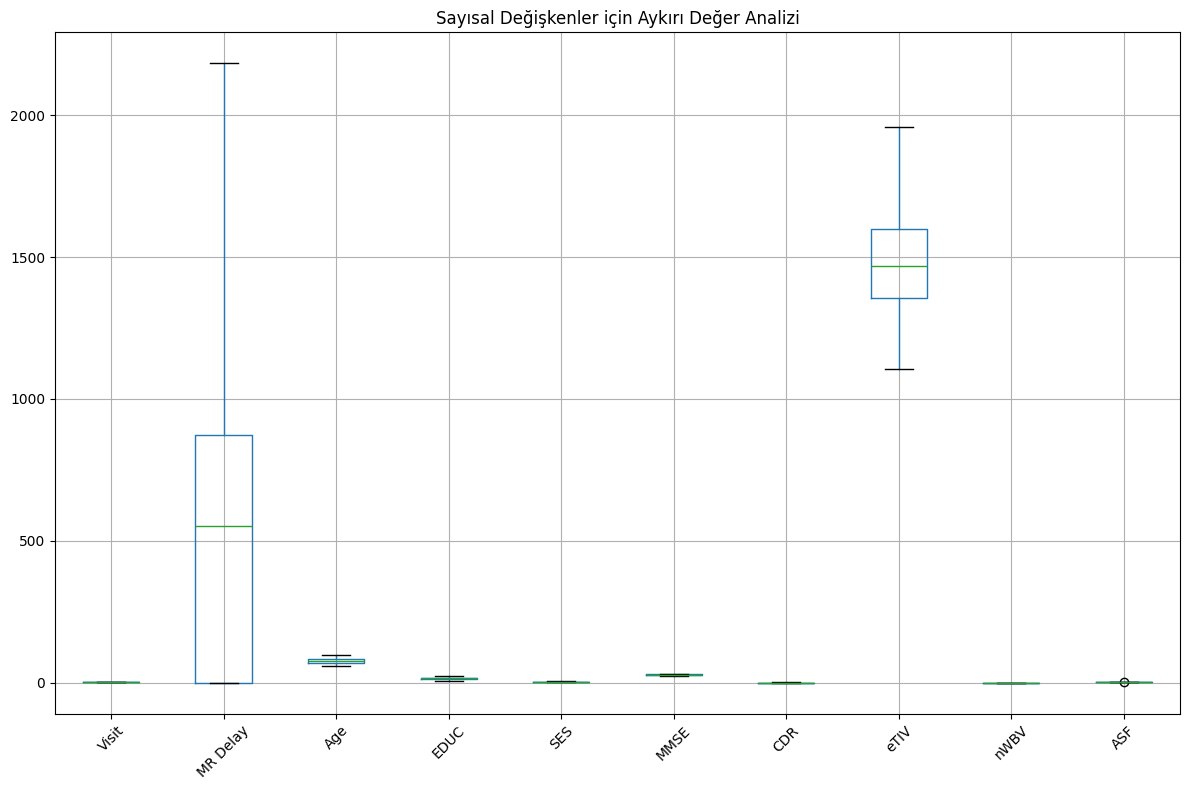


âœ…GÃ¼ncellenmiÅŸ veri seti:
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87  14.0   
1  OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88  14.0   
2  OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75  12.0   
3  OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76  12.0   
4  OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80  12.0   

        SES  MMSE  CDR    eTIV   nWBV    ASF  
0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1  2.000000  30.0  0.0  1957.0  0.681  0.876  
2  2.460452  23.0  0.5  1678.0  0.736  1.046  
3  2.460452  28.0  0.5  1738.0  0.713  1.010  
4  2.460452  22.5  0.5  1698.0  0.701  1.034  


Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2182.5   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0   F    R   65   

     EDUC       SES  MMSE  CDR    eTIV   nWBV    ASF  
0    14.0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1    14.0  2.000000  30.0  0.0  1957.0  0.681  0.876  
2    12.0  2.460452  23.0  0.5  1678.0  0.736  1.046  
3    12.0  2.460452  28.0  0.5  1738.0  0.713  1.010  
4    12.0  2.460452  22.5  0.5  1698.0  0.701  1.034  
..    ...       ...   ...  ...     ...    ...    ...  
368  16.0  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  16.0  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  13.0  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  13.0  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  13.0  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [410]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

print("\nâœ…GÃ¼ncellenmiÅŸ veri seti:") # (AykÄ±rÄ± deÄŸerler giderildi)
print(oasis.head())
oasis

## Veri GÃ¶rselleÅŸtirme

Text(0.5, 1.0, 'Gurup daÄŸÄ±lÄ±mÄ±')

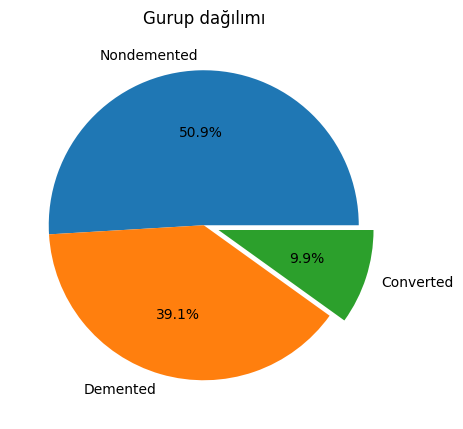

In [411]:
director_count = oasis["Group"].str.split(expand=True).stack().value_counts()
explode = [0,0,0.1]

plt.figure(figsize=(5,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", explode = explode)

plt.title("Gurup daÄŸÄ±lÄ±mÄ±") # Ã‡ok bÃ¼yÃ¼k veri dengesizliÄŸi!

### Histogram tablolarÄ±

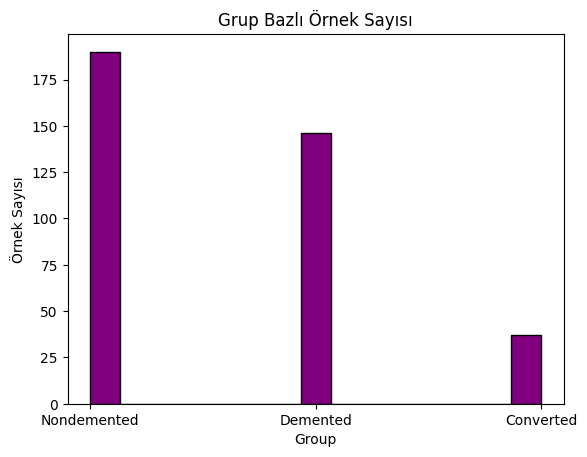

In [412]:
plt.hist(oasis["Group"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Group")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Grup BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

# plt.xticks(rotation = 0)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

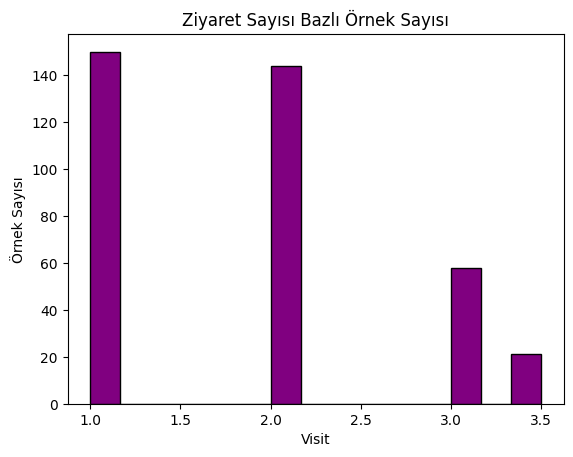

In [413]:
plt.hist(oasis["Visit"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Visit")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Ziyaret SayÄ±sÄ± BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

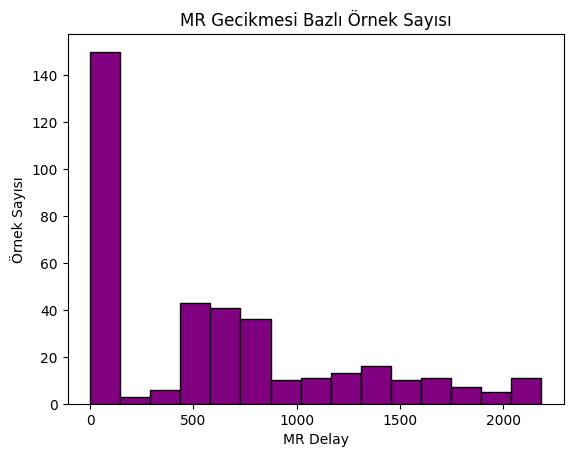

In [414]:
plt.hist(oasis["MR Delay"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("MR Delay")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "MR Gecikmesi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

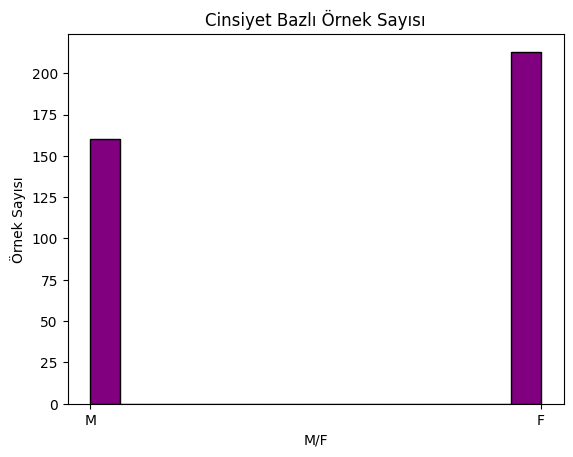

In [415]:
plt.hist(oasis["M/F"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("M/F")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Cinsiyet BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()
# M/F hÃ¢lÃ¢ sayÄ±sal veri deÄŸil M ve F ÅŸeklinde

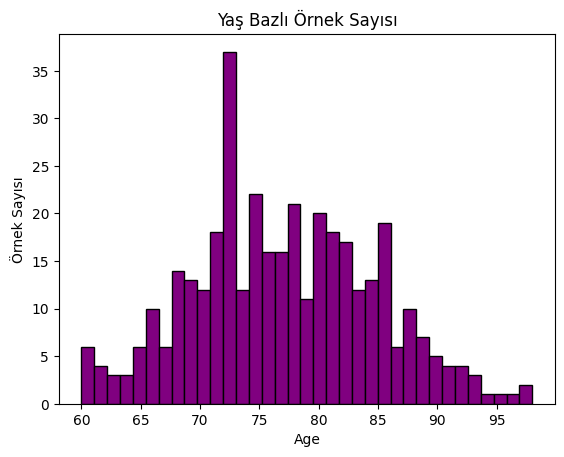

In [416]:
plt.hist(oasis["Age"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "YaÅŸ BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

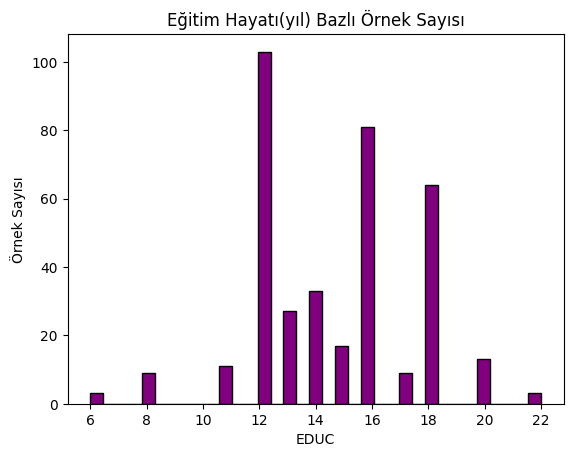

In [417]:
plt.hist(oasis["EDUC"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("EDUC")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "EÄŸitim HayatÄ±(yÄ±l) BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

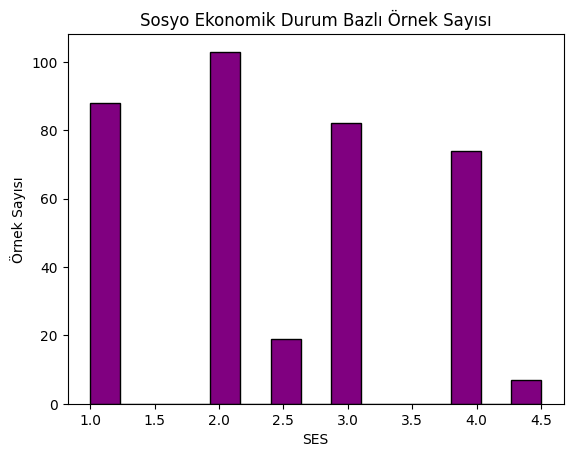

In [418]:
plt.hist(oasis["SES"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("SES")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Sosyo Ekonomik Durum BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

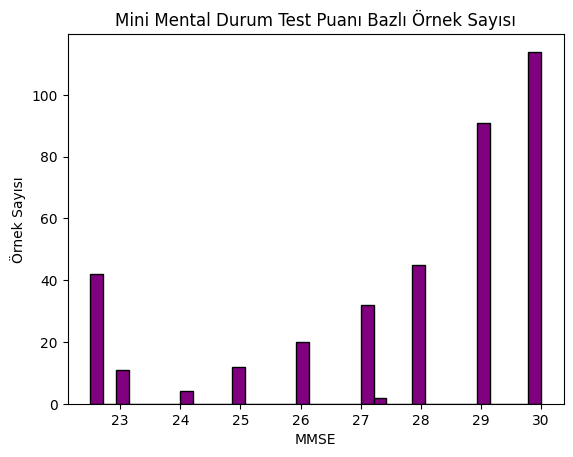

In [419]:
plt.hist(oasis["MMSE"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("MMSE")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Mini Mental Durum Test PuanÄ± BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

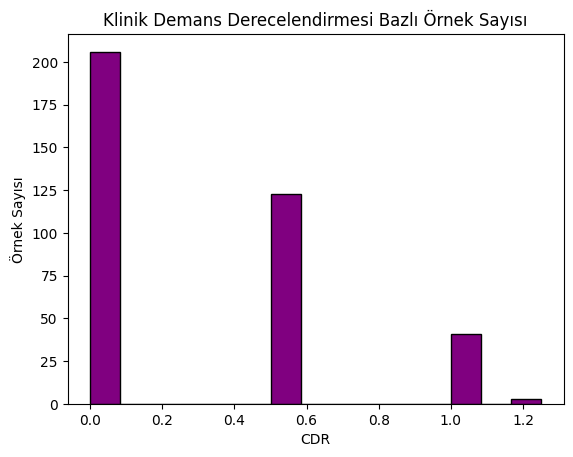

In [420]:
plt.hist(oasis["CDR"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("CDR")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Klinik Demans Derecelendirmesi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

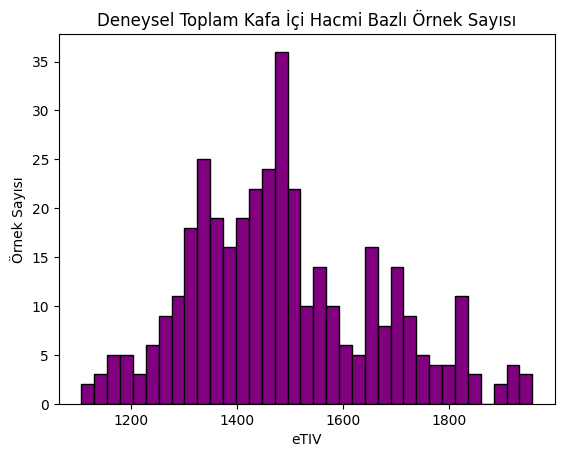

In [421]:
plt.hist(oasis["eTIV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("eTIV")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Deneysel Toplam Kafa Ä°Ã§i Hacmi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

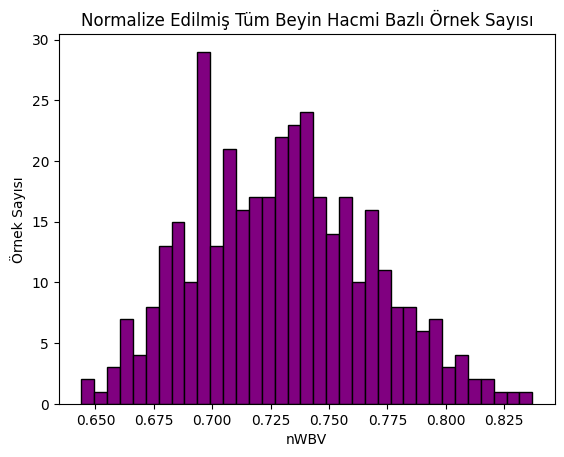

In [422]:
plt.hist(oasis["nWBV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("nWBV")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

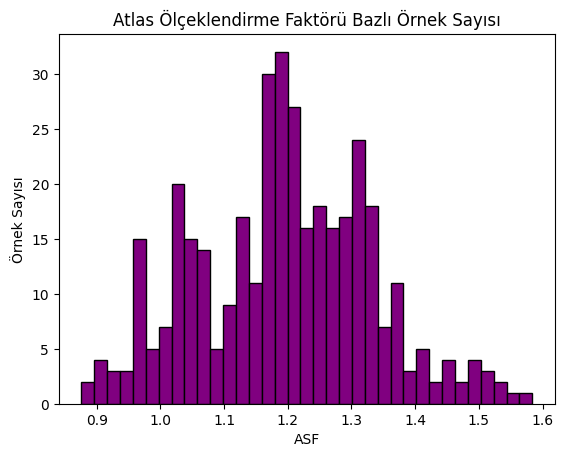

In [423]:
plt.hist(oasis["ASF"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("ASF")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼ BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

### Scatter Tablosu

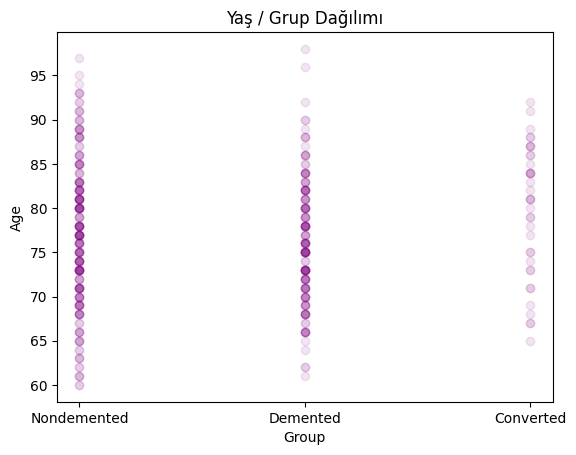

In [424]:
plt.scatter(oasis["Group"], oasis["Age"], color="purple", alpha= 0.1)
plt.title("YaÅŸ / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('Age')
# plt.grid()
plt.show()

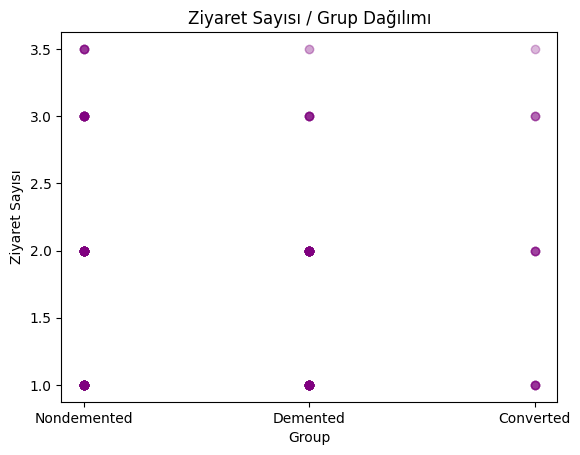

In [425]:
plt.scatter(oasis["Group"], oasis["Visit"], color="purple", alpha= 0.1)
plt.title("Ziyaret SayÄ±sÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('Ziyaret SayÄ±sÄ±')
plt.show()

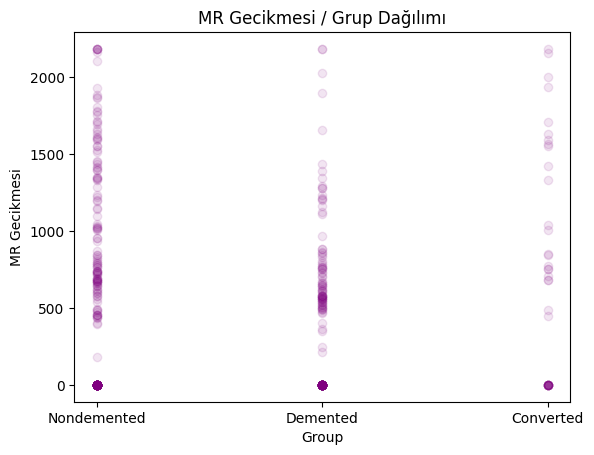

In [426]:
plt.scatter(oasis["Group"], oasis["MR Delay"], color="purple", alpha= 0.1)
plt.title("MR Gecikmesi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('MR Gecikmesi')
plt.show()

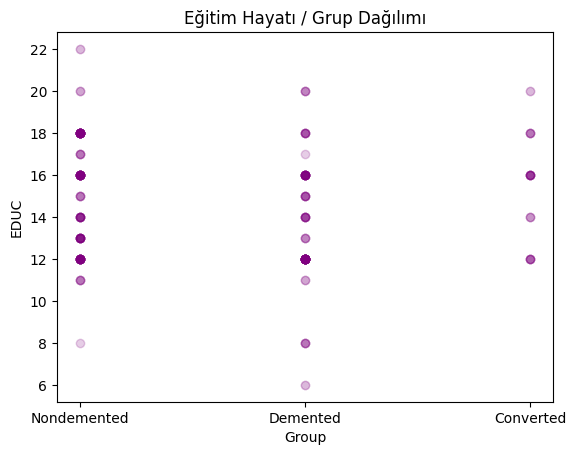

In [427]:
plt.scatter(oasis["Group"], oasis["EDUC"], color="purple", alpha= 0.1)
plt.title("EÄŸitim HayatÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('EDUC')
plt.show()

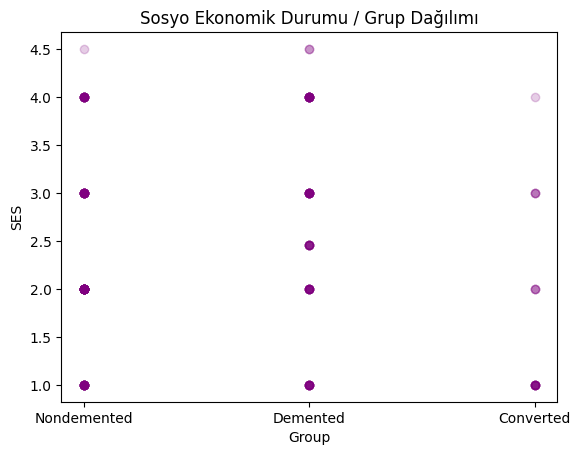

In [428]:
plt.scatter(oasis["Group"], oasis["SES"], color="purple", alpha= 0.1)
plt.title("Sosyo Ekonomik Durumu / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('SES')
plt.show()

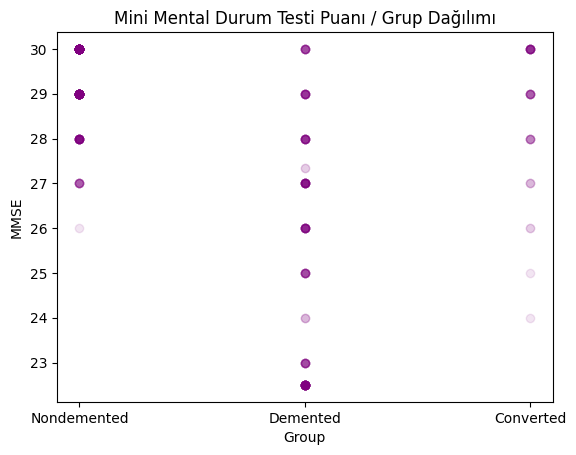

In [429]:
plt.scatter(oasis["Group"], oasis["MMSE"], color="purple", alpha= 0.1)
plt.title("Mini Mental Durum Testi PuanÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()

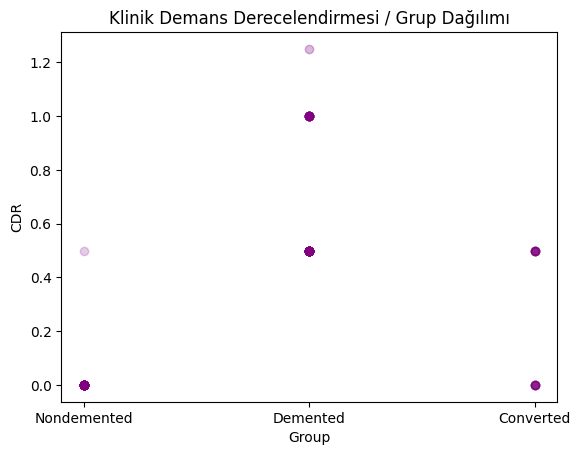

In [430]:
plt.scatter(oasis["Group"], oasis["CDR"], color="purple", alpha= 0.1)
plt.title("Klinik Demans Derecelendirmesi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('CDR')
plt.show()

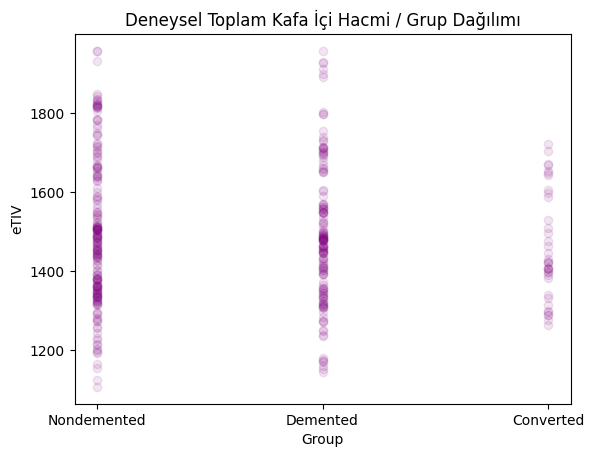

In [431]:
plt.scatter(oasis["Group"], oasis["eTIV"], color="purple", alpha= 0.1)
plt.title("Deneysel Toplam Kafa Ä°Ã§i Hacmi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

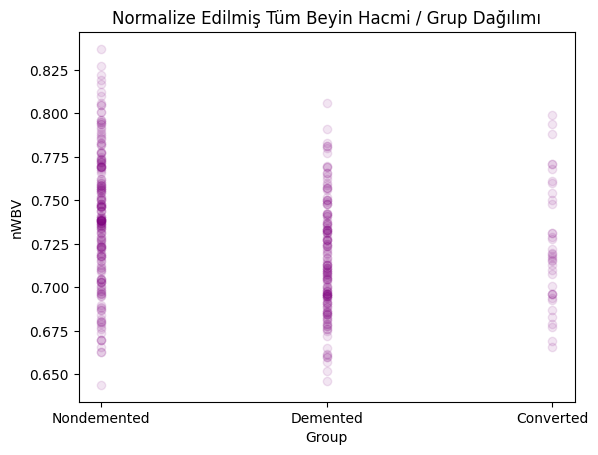

In [432]:
plt.scatter(oasis["Group"], oasis["nWBV"], color="purple", alpha= 0.1)
plt.title("Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

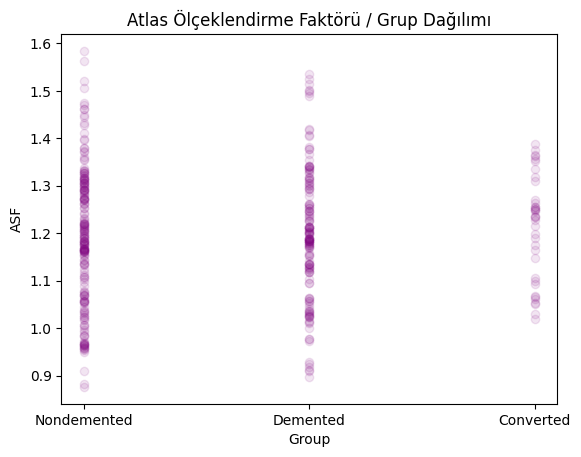

In [433]:
plt.scatter(oasis["Group"], oasis["ASF"], color="purple", alpha= 0.1)
plt.title("Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼ / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('ASF')
plt.show()

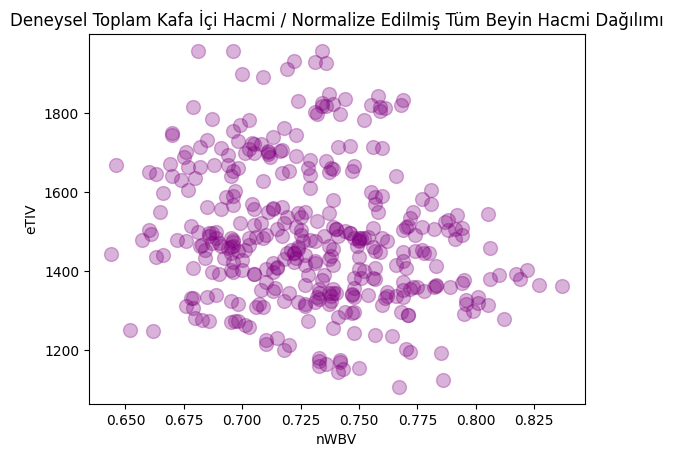

In [434]:
plt.scatter(oasis["nWBV"], oasis["eTIV"], color="purple", alpha= 0.3, s= 100)
plt.title("Deneysel Toplam Kafa Ä°Ã§i Hacmi / Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('nWBV')
plt.ylabel('eTIV')
plt.show()

# Makine Ã–ÄŸrenmesi

In [551]:
# GÃ¼ncellenmiÅŸ veriyi makine Ã¶ÄŸrenmesine hazÄ±r olacak ÅŸekilde kaydet
oasis.to_csv("oasisUpdateMakine.csv", index=False)

# Makine Ã¶ÄŸrenmesinde kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

In [552]:
oasis

Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      2    1.0       0.0    1     0   87  14.0   
1    OAS2_0001  OAS2_0001_MR2      2    2.0     457.0    1     0   88  14.0   
2    OAS2_0002  OAS2_0002_MR1      1    1.0       0.0    1     0   75  12.0   
3    OAS2_0002  OAS2_0002_MR2      1    2.0     560.0    1     0   76  12.0   
4    OAS2_0002  OAS2_0002_MR3      1    3.0    1895.0    1     0   80  12.0   
..         ...            ...    ...    ...       ...  ...   ...  ...   ...   
368  OAS2_0185  OAS2_0185_MR2      1    2.0     842.0    1     0   82  16.0   
369  OAS2_0185  OAS2_0185_MR3      1    3.0    2182.5    1     0   86  16.0   
370  OAS2_0186  OAS2_0186_MR1      2    1.0       0.0    0     0   61  13.0   
371  OAS2_0186  OAS2_0186_MR2      2    2.0     763.0    0     0   63  13.0   
372  OAS2_0186  OAS2_0186_MR3      2    3.0    1608.0    0     0   65  13.0   

          SES  MMSE  CDR    eTIV   nWBV    ASF  
0    2.000000  27.0  0.0  1957.0  0.696  0.883  
1    2.000000  30.0  0.0  1957.0  0.681  0.876  
2    2.460452  23.0  0.5  1678.0  0.736  1.046  
3    2.460452  28.0  0.5  1738.0  0.713  1.010  
4    2.460452  22.5  0.5  1698.0  0.701  1.034  
..        ...   ...  ...     ...    ...    ...  
368  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# GÃ¼ncellenmiÅŸ veriyi yÃ¼kle
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Kategorik sÃ¼tunlarÄ± sayÄ±sal verilere Ã§evir (encoding)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

# Gerekli olmayan sÃ¼tunlarÄ± Ã§Ä±kar
# Subject ID ve MRI ID Ã¶nemli olmadÄ±ÄŸÄ±ndan Ã§Ä±karÄ±ldÄ±. Hand hep deÄŸerleri aynÄ± olduÄŸundan Ã§Ä±karÄ±ldÄ±
# Geriye kalan sÃ¼tunlar X(BaÄŸÄ±msÄ±z DeÄŸiÅŸkenler) deÄŸiÅŸkene atandÄ±
# axis=1: SÃ¼tunlarÄ± hedef aldÄ±ÄŸÄ±nÄ± belirtir (satÄ±rlarÄ± kaldÄ±rmak iÃ§in axis=0 kullanÄ±lÄ±r)
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

In [554]:
# Veriyi eÄŸitim (%80) ve test (%20) olarak ayÄ±r (test_size=0.2)
# X_train: EÄŸitim iÃ§in kullanÄ±lacak baÄŸÄ±msÄ±z deÄŸiÅŸkenler.
# X_test : Test iÃ§in kullanÄ±lacak baÄŸÄ±msÄ±z deÄŸiÅŸkenler.
# y_train: EÄŸitim iÃ§in kullanÄ±lacak hedef deÄŸiÅŸken.
# y_test : Test iÃ§in kullanÄ±lacak hedef deÄŸiÅŸken.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluÅŸturma ve eÄŸitme
# Model OluÅŸturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
# Model EÄŸitme
rf_model.fit(X_train, y_train)

# Test verisi (X_test) ile tahmin yap
y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]


In [555]:
# Model performansÄ±nÄ± yazdÄ±r

# DoÄŸruluk OranÄ±, test verilerindeki (DoÄŸru Tahmin SayÄ±sÄ± / Toplam Tahmin SayÄ±sÄ±)
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))


# Precision (Kesinlik): Tahmin edilen sÄ±nÄ±fa ait Ã¶rneklerin ne kadarÄ±nÄ±n doÄŸru olduÄŸunu Ã¶lÃ§er.
# Recall (DuyarlÄ±lÄ±k) : GerÃ§ek sÄ±nÄ±fa ait Ã¶rneklerin ne kadarÄ±nÄ±n doÄŸru tahmin edildiÄŸini Ã¶lÃ§er.
# F1-Score            : Precision ve Recall'un harmonik ortalamasÄ±dÄ±r.
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# SÄ±nÄ±flandÄ±rma Raporu'nun yorumu
#   SÄ±nÄ±f 0 Converted:
#      Precision: 0.75 (Modelin "0" dediÄŸi Ã¶rneklerin %75'i doÄŸru)
#      Recall   : 0.27 (GerÃ§ek "0" Ã¶rneklerinin sadece %27'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.40 (DÃ¼ÅŸÃ¼k performans)

#   SÄ±nÄ±f 1 Demented:
#      Precision: 0.94 (Modelin "1" dediÄŸi Ã¶rneklerin %94'Ã¼ doÄŸru)
#      Recall   : 0.97 (GerÃ§ek "1" Ã¶rneklerinin %97'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.95 (Ã‡ok iyi performans)

#   SÄ±nÄ±f 2 Nondemented:
#      Precision: 0.82 (Modelin "2" dediÄŸi Ã¶rneklerin %82'si doÄŸru)
#      Recall   : 0.97 (GerÃ§ek "2" Ã¶rneklerinin %97'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.89 (Ä°yi performans)


# Bu matris, modelin tahminlerinin gerÃ§ek deÄŸerlerle nasÄ±l uyuÅŸtuÄŸunu gÃ¶sterir.
# SatÄ±rlar: GerÃ§ek sÄ±nÄ±flar
# SÃ¼tunlar: Tahmin edilen sÄ±nÄ±flar
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi'nin yorumu
# GerÃ§ek SÄ±nÄ±f	  Tahmin SÄ±nÄ±f 0	  Tahmin SÄ±nÄ±f 1	  Tahmin SÄ±nÄ±f 2	  Toplam
#    0	            3 (doÄŸru)	        1 (yanlÄ±ÅŸ)	        7 (yanlÄ±ÅŸ)	        11
#    1	            1 (yanlÄ±ÅŸ)	       31 (doÄŸru)	        0 (yanlÄ±ÅŸ)	        32
#    2	            0 (yanlÄ±ÅŸ)	        1 (yanlÄ±ÅŸ)	       31 (doÄŸru)	        32

#   SÄ±nÄ±f 0 Converted (11 Ã¶rnek):
#      Model, sadece 3 tanesini doÄŸru tahmin etmiÅŸ, 8'ini yanlÄ±ÅŸ sÄ±nÄ±flandÄ±rmÄ±ÅŸ
#   SÄ±nÄ±f 1 Demented (32 Ã¶rnek):
#      31 Ã¶rneÄŸi doÄŸru, sadece 1 tanesi yanlÄ±ÅŸ
#   SÄ±nÄ±f 2 Nondemented (32 Ã¶rnek):
#      31 Ã¶rneÄŸi doÄŸru, sadece 1 tanesi yanlÄ±ÅŸ

DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]


DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


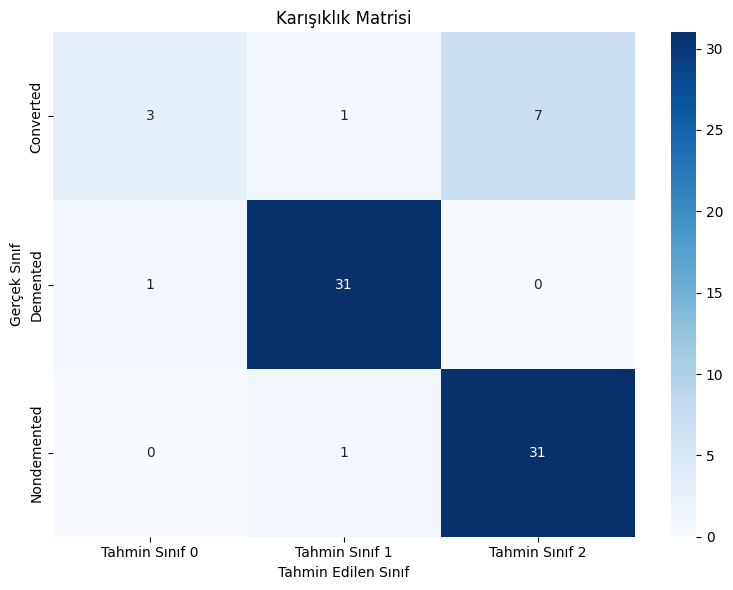

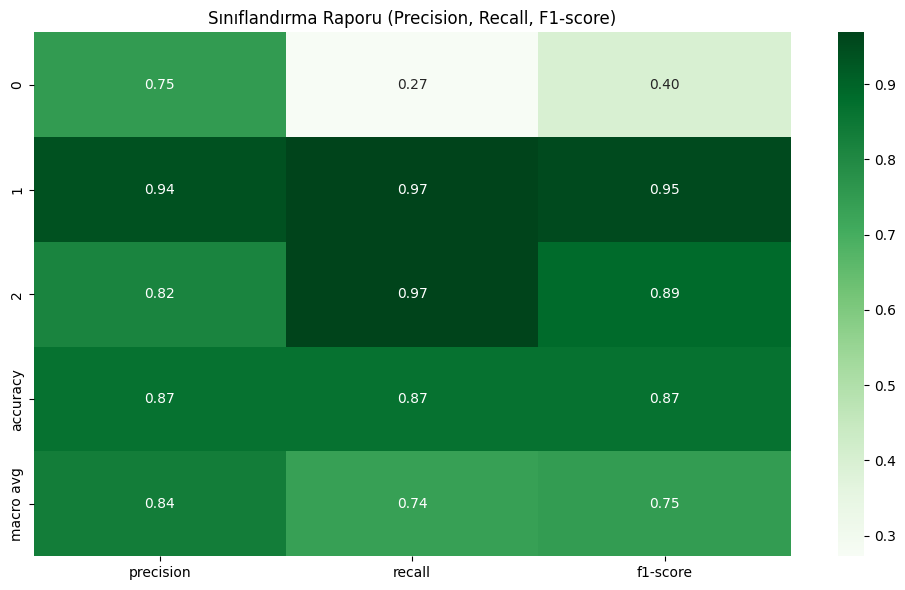

In [556]:
# DoÄŸruluk OranÄ±
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisini gÃ¶rselleÅŸtir
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], 
            yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

# SÄ±nÄ±flandÄ±rma raporunu gÃ¶rselleÅŸtir

# SÄ±nÄ±flandÄ±rma Raporunu Al
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Raporu DataFrame'e DÃ¶nÃ¼ÅŸtÃ¼r
report_df = pd.DataFrame(report_dict).transpose()

# GÃ¶rselleÅŸtir
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

## Accuracy artÄ±rma Ã§alÄ±ÅŸmalarÄ±


Ã–zellik Ã–nem Tablosu:
     feature  importance
6       CDR    0.492248
5      MMSE    0.149956
8      nWBV    0.074405
0  MR Delay    0.068583
2       Age    0.047408
9       ASF    0.042121
3      EDUC    0.039958
7      eTIV    0.036795
4       SES    0.030847
1       M/F    0.017679


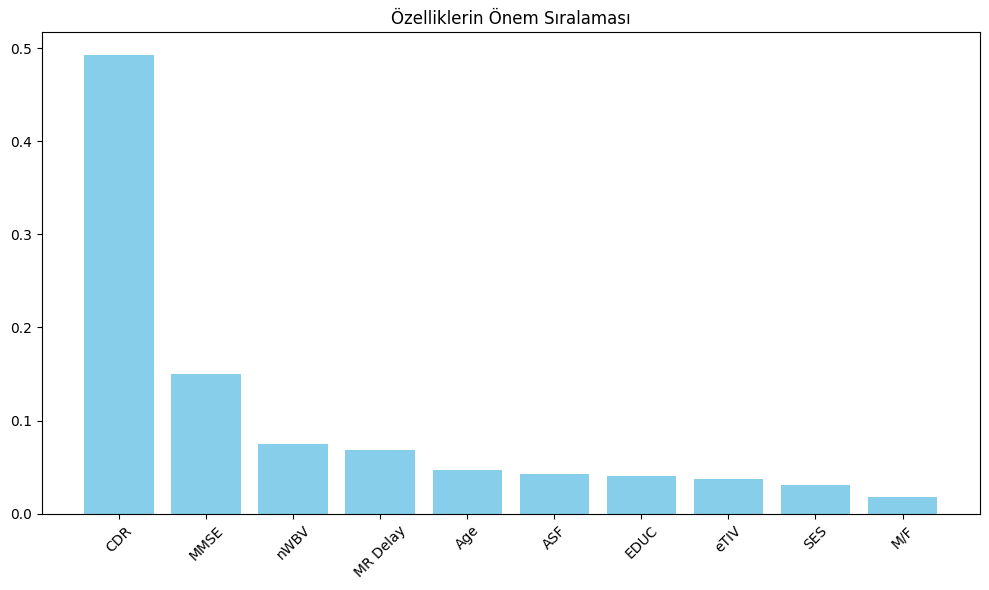

In [557]:
# Ã–zellik Ã¶nem tablosu
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)
print("\nÃ–zellik Ã–nem Tablosu:\n", feature_importance_df)

# Ã–zellik Ã¶nemlerini gÃ¶rselleÅŸtir
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title("Ã–zelliklerin Ã–nem SÄ±ralamasÄ±")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

### AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nce | acc : 0.8666666666666667

In [558]:
# AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nceye geri dÃ¶nÃ¼ÅŸ:
oasis = pd.read_csv("oasisUpdateNull.csv")

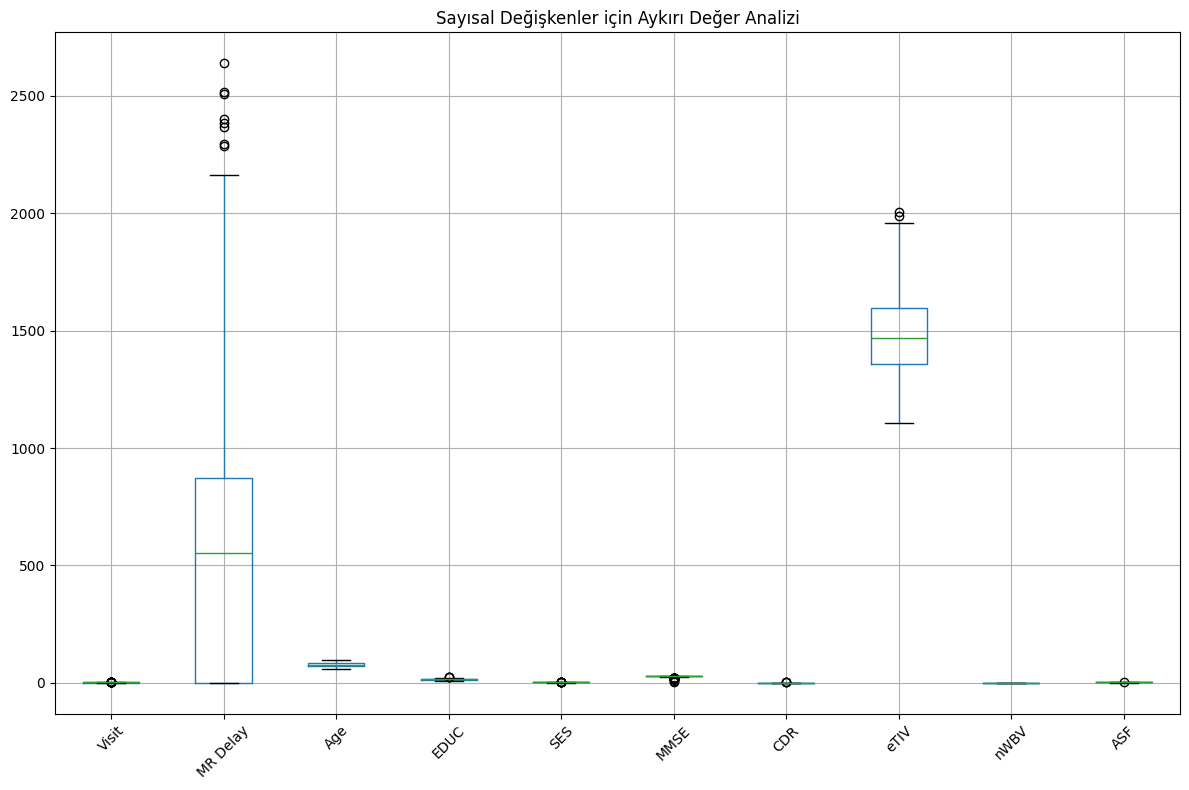

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  27.0  0.0  1987  0.696  0.883  
1      14  2.000000  30.0  0.0  2004  0.681  0.876  
2      12  2.460452  23.0  0.5  1678  0.736  1.046  
3      12  2.460452  28.0  0.5  1738  0.713  1.010  
4      12  2.460452  22.0  0.5  1698  0.701  1.034  
..    ...       ...   ...  ...   ...    ...    ...  
368    16  1.000000  28.0  0.5  1693  0.694  1.037  
369    16  1.000000  26.0  0.5  1688  0.675  1.040  
370    13  2.000000  30.0  0.0  1319  0.801  1.331  
371    13  2.000000  30.0  0.0  1327  0.796  1.323  
372    13  2.000000  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [559]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

oasis

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


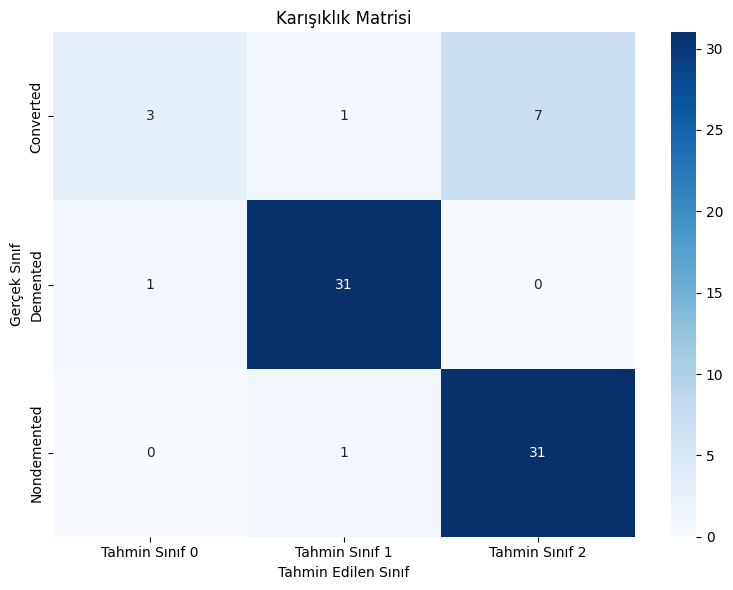

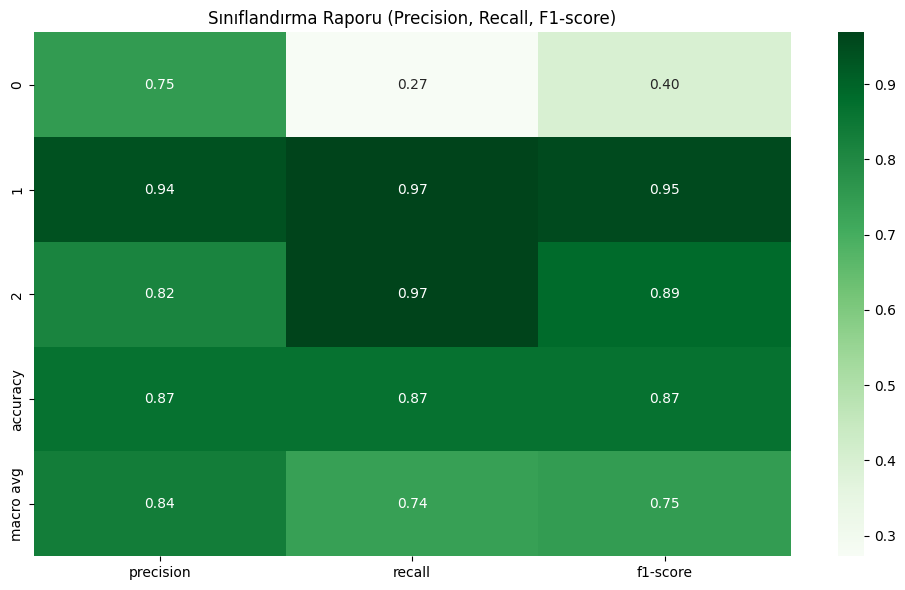

In [560]:
# AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nce:
oasis = pd.read_csv("oasisUpdateNull.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### AykÄ±rÄ± deÄŸerler fixlendikten sonra | acc : 0.8666666666666667

In [561]:
# GÃ¼ncel veri tabanÄ±mÄ±za geri dÃ¶nelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

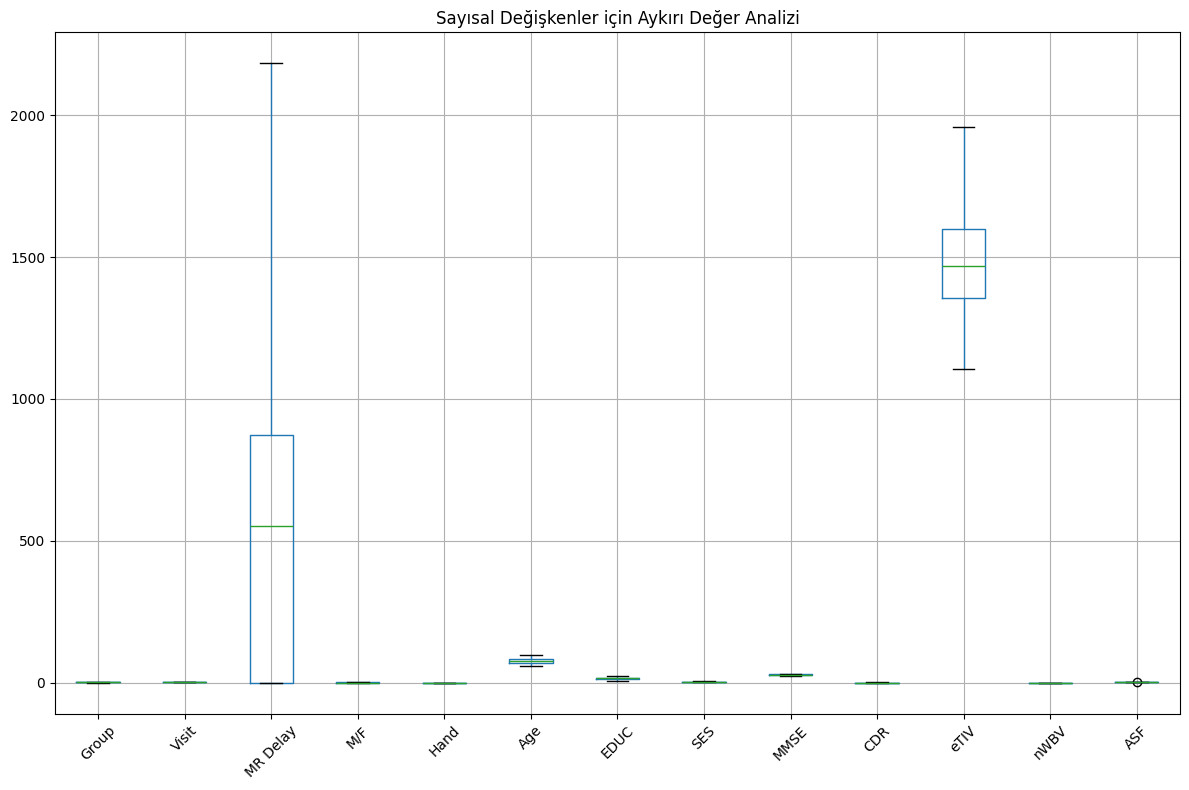

Subject ID         MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1      2    1.0       0.0    1     0   87  14.0   
1    OAS2_0001  OAS2_0001_MR2      2    2.0     457.0    1     0   88  14.0   
2    OAS2_0002  OAS2_0002_MR1      1    1.0       0.0    1     0   75  12.0   
3    OAS2_0002  OAS2_0002_MR2      1    2.0     560.0    1     0   76  12.0   
4    OAS2_0002  OAS2_0002_MR3      1    3.0    1895.0    1     0   80  12.0   
..         ...            ...    ...    ...       ...  ...   ...  ...   ...   
368  OAS2_0185  OAS2_0185_MR2      1    2.0     842.0    1     0   82  16.0   
369  OAS2_0185  OAS2_0185_MR3      1    3.0    2182.5    1     0   86  16.0   
370  OAS2_0186  OAS2_0186_MR1      2    1.0       0.0    0     0   61  13.0   
371  OAS2_0186  OAS2_0186_MR2      2    2.0     763.0    0     0   63  13.0   
372  OAS2_0186  OAS2_0186_MR3      2    3.0    1608.0    0     0   65  13.0   

          SES  MMSE  CDR    eTIV   nWBV    ASF  
0    2.000000  27.0  0.0  1957.0  0.696  0.883  
1    2.000000  30.0  0.0  1957.0  0.681  0.876  
2    2.460452  23.0  0.5  1678.0  0.736  1.046  
3    2.460452  28.0  0.5  1738.0  0.713  1.010  
4    2.460452  22.5  0.5  1698.0  0.701  1.034  
..        ...   ...  ...     ...    ...    ...  
368  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [562]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

oasis

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


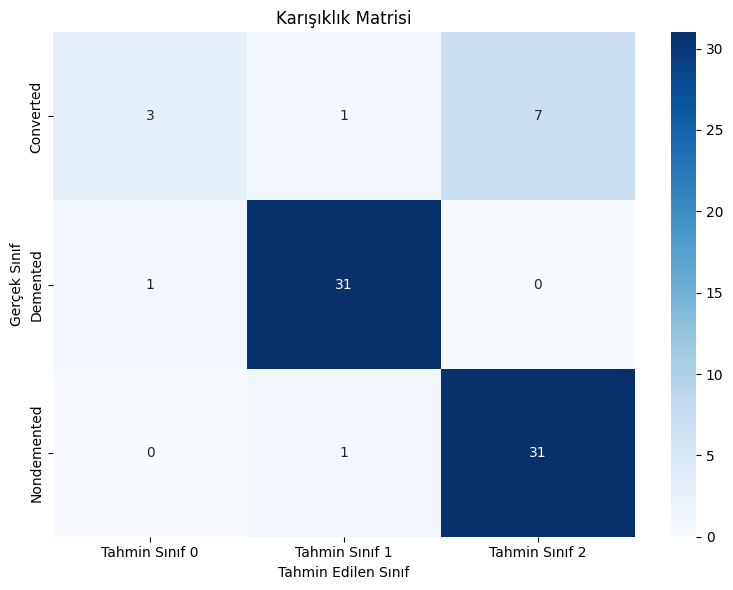

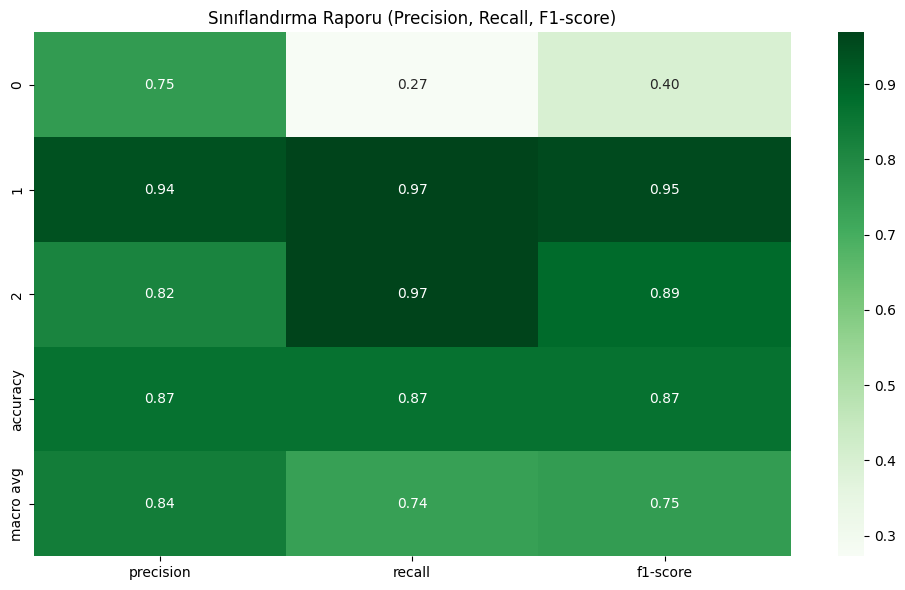

In [563]:
# GÃ¼ncel veri tabanÄ±mÄ±za geri dÃ¶nelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV, M/F | acc : 0.8666666666666667

In [564]:
# BurasÄ±, AykÄ±rÄ± deÄŸerler fixlendikten sonra'nÄ±n aynÄ±sÄ±dÄ±r!
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.8666666666666667

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



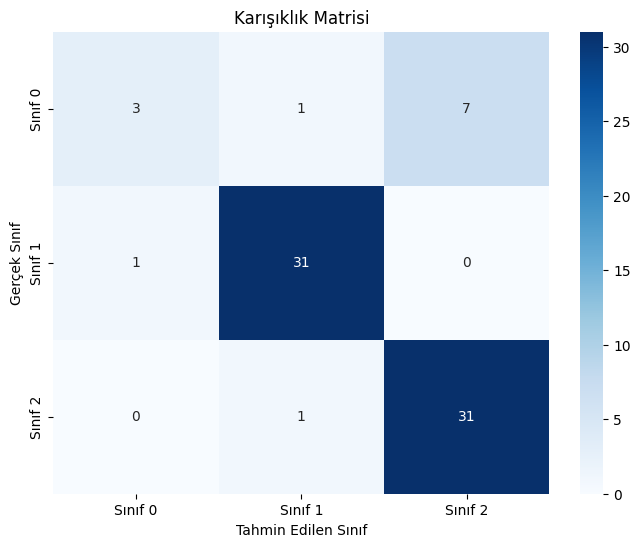

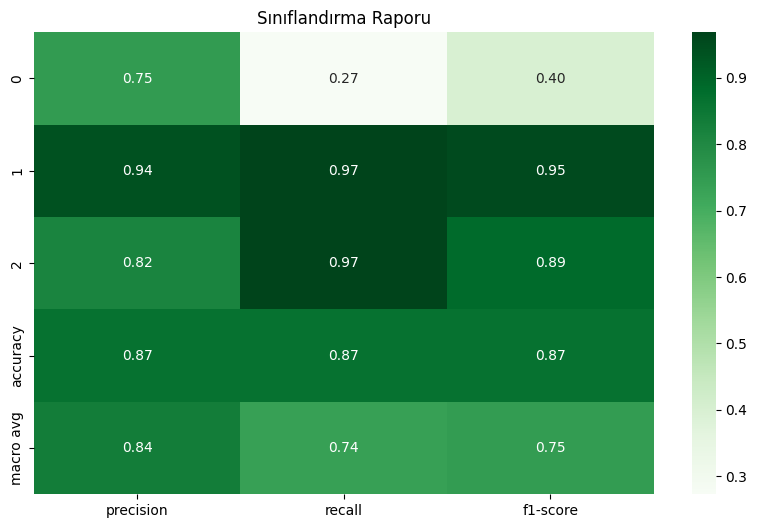

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay | acc : 0.84

In [566]:
# Ekstra olarak 'Age', 'SES', 'EDUC', 'ASF', 'eTIV', 'M/F' deÄŸerleri alÄ±nmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F', 'eTIV', 'ASF', 'EDUC', 'SES', 'Age'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.84

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 3 29  0]
 [ 1  1 30]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.94      0.91      0.92        32
           2       0.83      0.94      0.88        32

    accuracy                           0.84        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.83      0.84      0.83        75



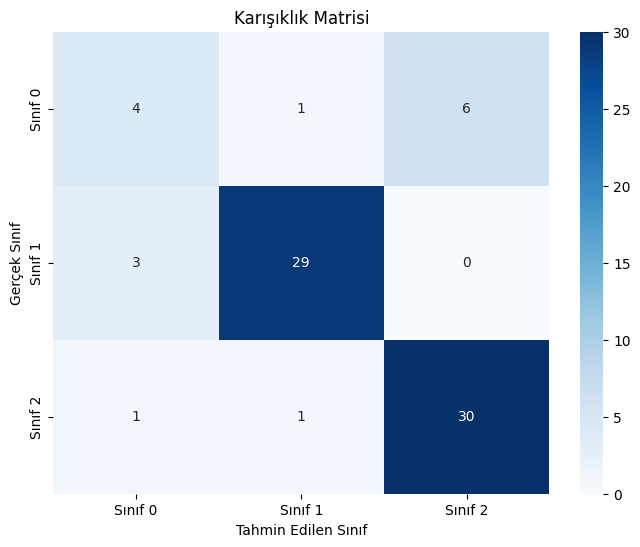

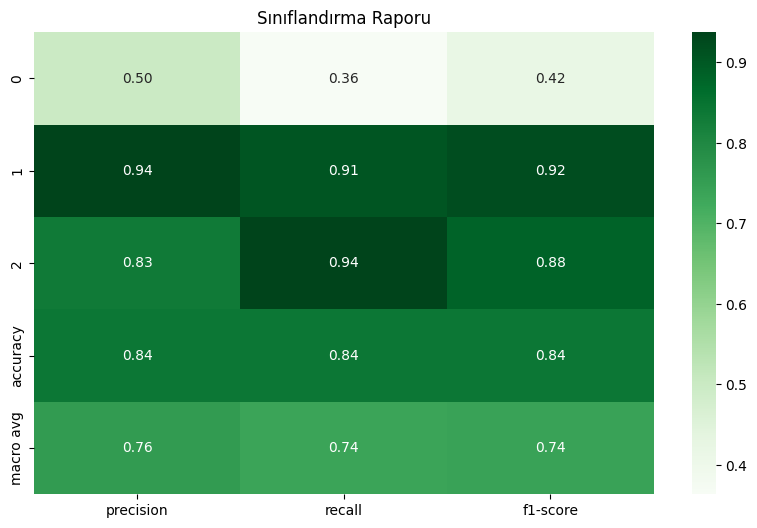

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV | acc : 0.88

In [568]:
# Ekstra olarak 'M/F' deÄŸeri alÄ±nmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.88

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 1 31  0]
 [ 0  1 31]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.84      0.97      0.90        32

    accuracy                           0.88        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.88      0.88      0.86        75



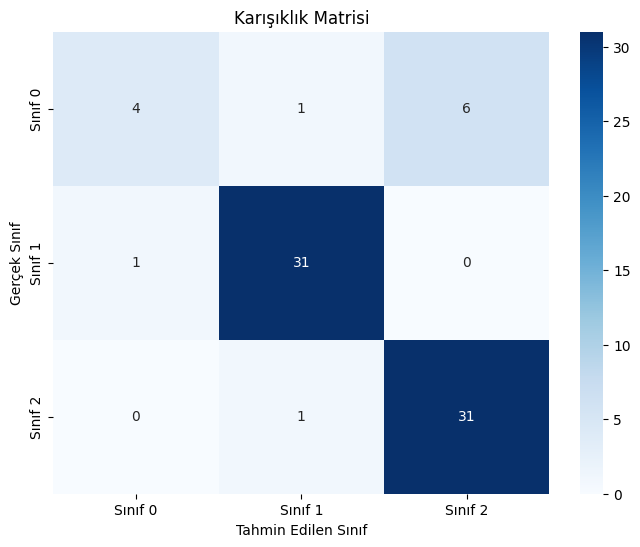

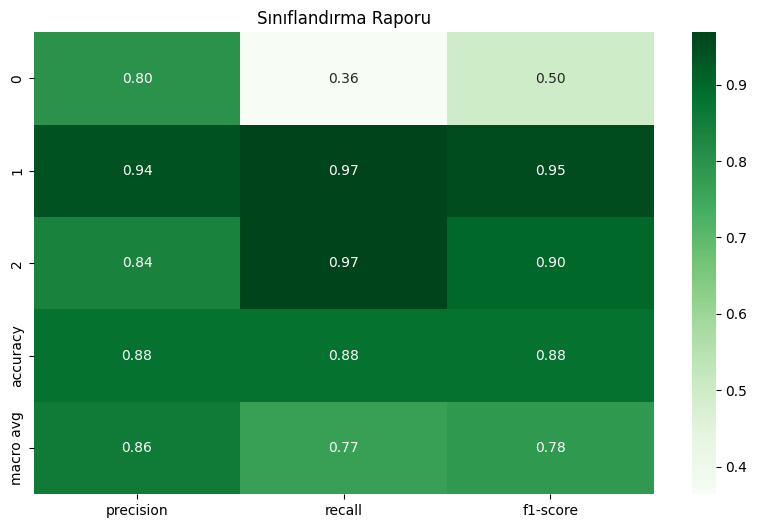

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

# 2. DÃ¶nem

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [600]:
# Veriyi oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Veriyi kaydet (2. dÃ¶nemde kullanÄ±lacak veri)
oasis.to_csv("oasisUpdate2.csv", index=False)

# 2. DÃ¶nemde kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdate2.csv")

## Smote

DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


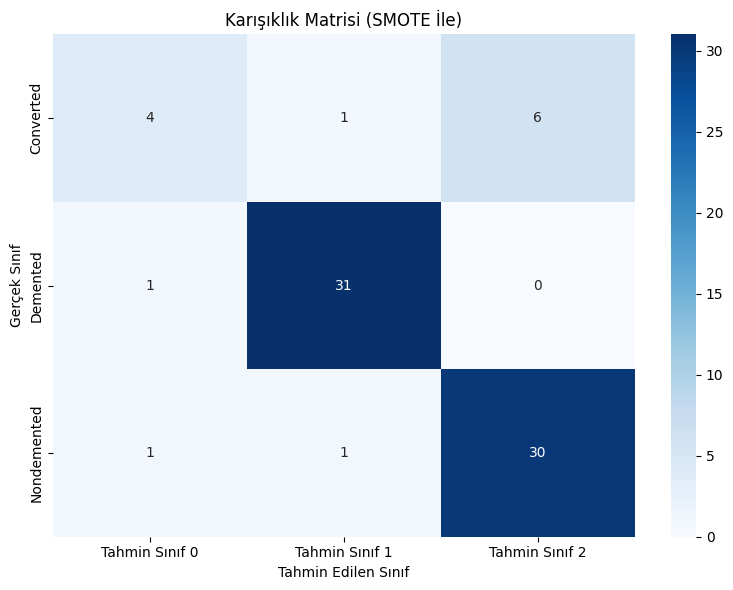

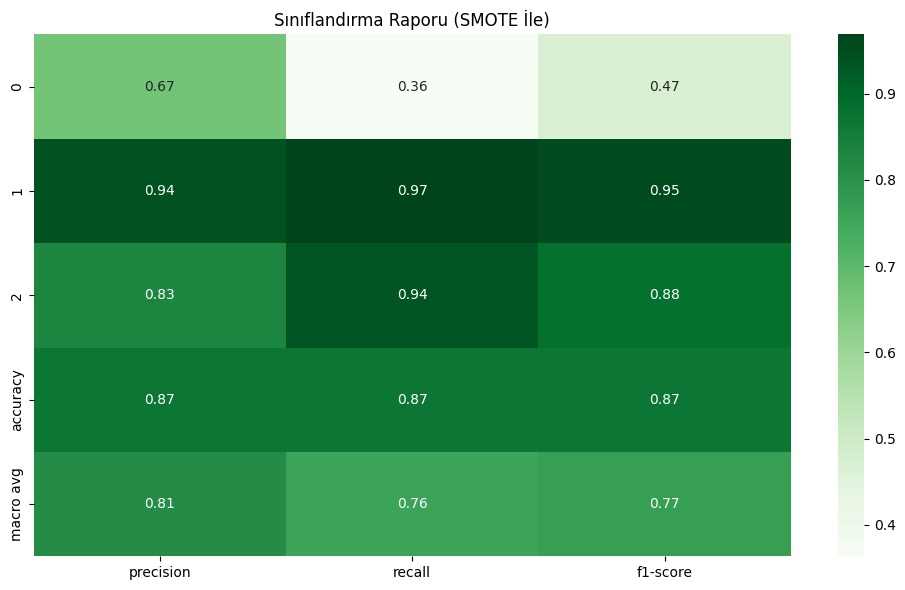

In [601]:
# Kategorik sÃ¼tunlarÄ± sayÄ±sal verilere Ã§evir (encoding)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

# Ã–zellikler ve hedef deÄŸiÅŸken
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # 'Subject ID', 'MRI ID', 'Hand', 'Visit' gibi bilgiler dahil edilmez
y = oasis['Group']  # Hedef deÄŸiÅŸken 'Group'

# EÄŸitim ve test verilerini ayÄ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE ile yalnÄ±zca eÄŸitim verisini dengele
smote = SMOTE(random_state=42)  # Smote'a Ã¶zel random state
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Random Forest modelini oluÅŸtur ve eÄŸit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Test seti Ã¼zerinde tahmin yap
y_pred = rf_model.predict(X_test)

# Model deÄŸerlendirme
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], 
            yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi (SMOTE Ä°le)")
plt.tight_layout()
plt.show()

# SÄ±nÄ±flandÄ±rma Raporu GÃ¶rselleÅŸtirme
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (SMOTE Ä°le)")
plt.tight_layout()
plt.show()

Model DoÄŸruluÄŸu (Accuracy): 0.9578947368421052

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[29  0  1]
 [ 1 35  0]
 [ 1  1 27]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.97      0.97        36
           2       0.96      0.93      0.95        29

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



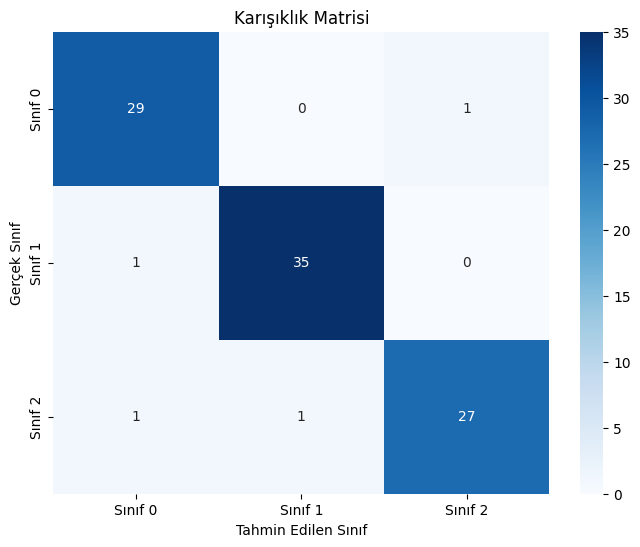

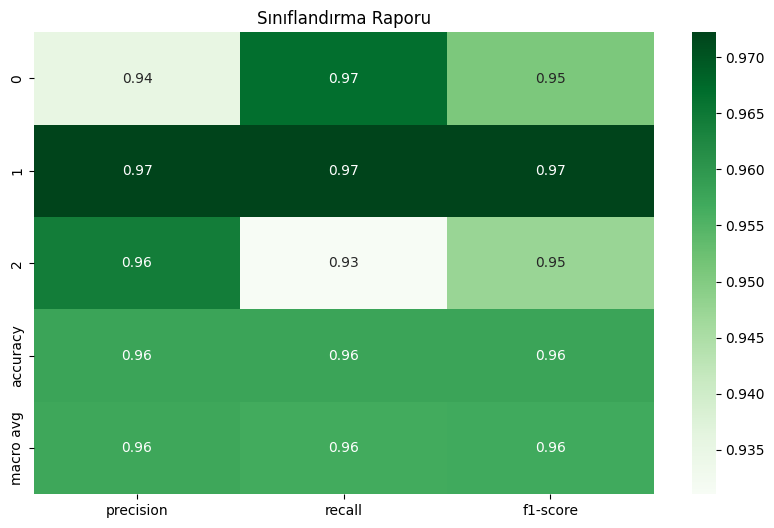

In [602]:
# EÄŸitim ve test verilerine bÃ¶lelim (SMOTE uygulandÄ±ktan sonra X_train, y_train deÄŸiÅŸtirildi)
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=42)

# Random Forest modelini oluÅŸturma ve eÄŸitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Test seti Ã¼zerinde tahmin yapma
y_pred = rf_classifier.predict(X_test)

# Model doÄŸruluÄŸu
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix)
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))

# SÄ±nÄ±flandÄ±rma Raporu (Classification Report)
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisi GÃ¶rselleÅŸtirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()

# SÄ±nÄ±flandÄ±rma Raporu GÃ¶rselleÅŸtirme
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

Model DoÄŸruluÄŸu (Accuracy): 0.968421052631579

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[32  0  1]
 [ 2 30  0]
 [ 0  0 30]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       1.00      0.94      0.97        32
           2       0.97      1.00      0.98        30

    accuracy                           0.97        95
   macro avg       0.97      0.97      0.97        95
weighted avg       0.97      0.97      0.97        95



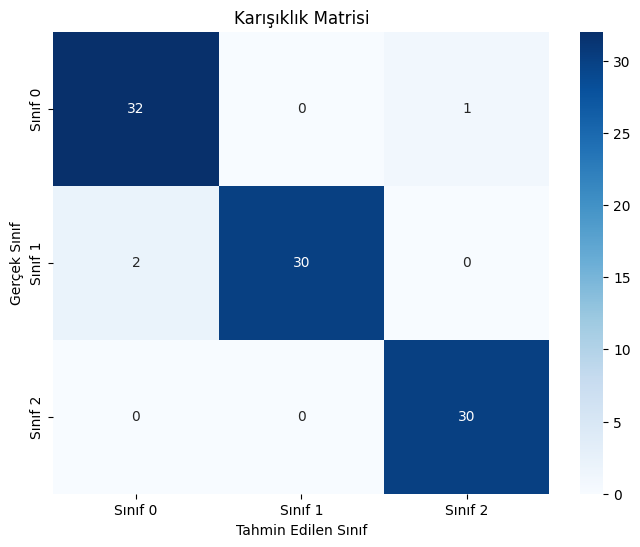

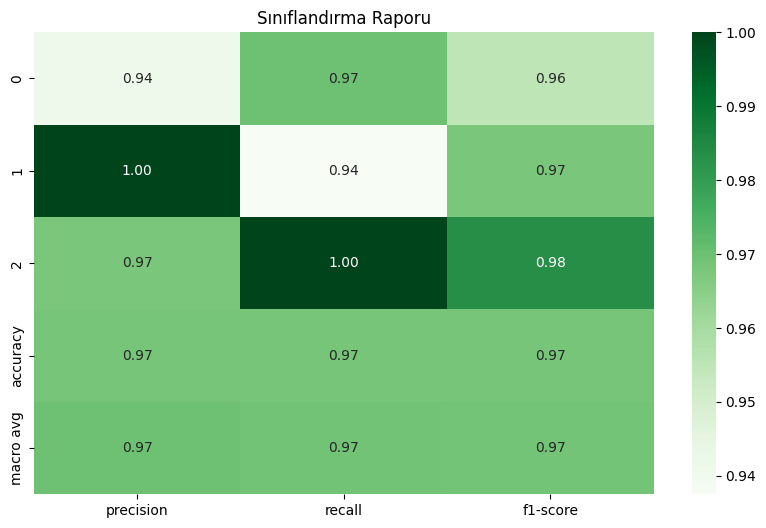

In [603]:
X_train, X_test, y_train, y_test = train_test_split(SmoteX_train, SmoteY_train, test_size=0.2, random_state=7)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

### ChatGPT

Model DoÄŸruluÄŸu (Accuracy): 0.9066666666666666

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 2  1  5]
 [ 1 28  0]
 [ 0  0 38]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.97      0.97      0.97        29
           2       0.88      1.00      0.94        38

    accuracy                           0.91        75
   macro avg       0.84      0.74      0.76        75
weighted avg       0.89      0.91      0.89        75



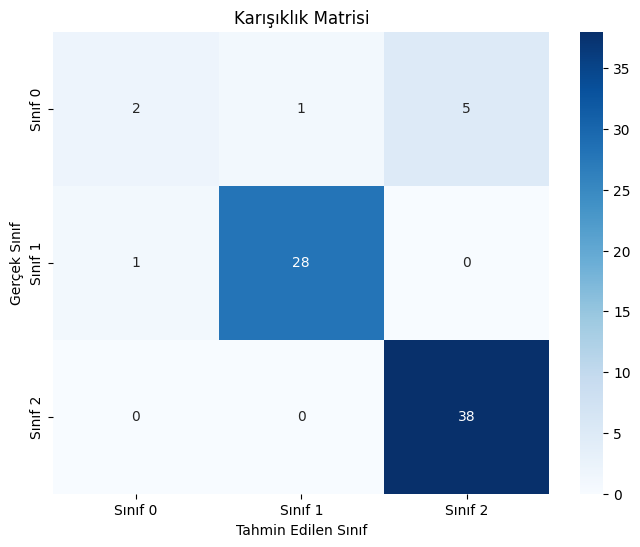

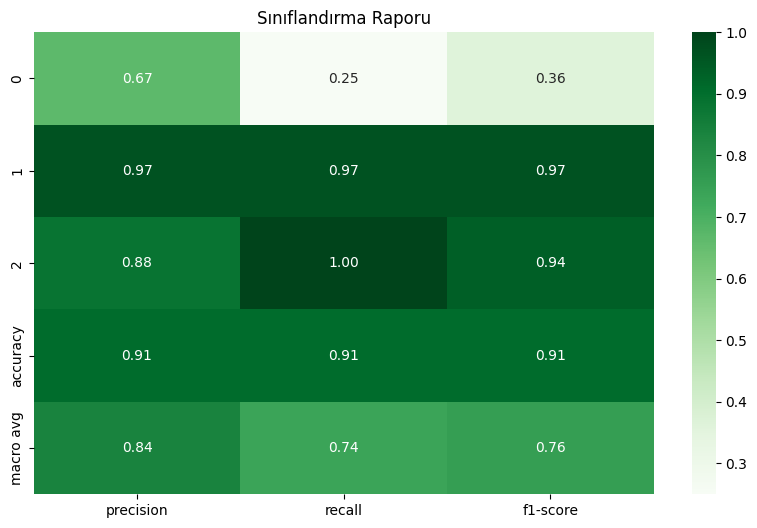

In [604]:
# 1. Veriyi eÄŸitim ve test olarak ayÄ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y, EÄŸitim ve test setindeki sÄ±nÄ±flar orijinal veri setindeki sÄ±nÄ±f oranlarÄ±na uygun ÅŸekilde ayrÄ±lÄ±r
# Bu, sÄ±nÄ±flar dengesiz olsa bile test setinde her sÄ±nÄ±ftan Ã¶rnek olmasÄ± iÃ§in Ã¶nemlidir

# 2. SADECE eÄŸitim verilerine SMOTE uygula
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Random Forest modelini eÄŸit
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# 4. Orijinal test verisiyle tahmin yap
y_pred = rf_classifier.predict(X_test)

# 5. DoÄŸruluk ve raporlarÄ± yazdÄ±r
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))

# 6. KarÄ±ÅŸÄ±klÄ±k Matrisi gÃ¶rselleÅŸtirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'],
            yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()

# 7. SÄ±nÄ±flandÄ±rma Raporu gÃ¶rselleÅŸtirme
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()


--- RANDOM STATE: 1 ---
SMOTE OLMADAN DoÄŸruluk: 0.9067
SMOTE ile     DoÄŸruluk: 0.9333

--- RANDOM STATE: 4 ---
SMOTE OLMADAN DoÄŸruluk: 0.9067
SMOTE ile     DoÄŸruluk: 0.8800

--- RANDOM STATE: 16 ---
SMOTE OLMADAN DoÄŸruluk: 0.8667
SMOTE ile     DoÄŸruluk: 0.9067

--- RANDOM STATE: 34 ---
SMOTE OLMADAN DoÄŸruluk: 0.8933
SMOTE ile     DoÄŸruluk: 0.9067

--- RANDOM STATE: 42 ---
SMOTE OLMADAN DoÄŸruluk: 0.9067
SMOTE ile     DoÄŸruluk: 0.9067

--- DOÄžRULUK KARÅžILAÅžTIRMASI ---
   Random State  Accuracy (No SMOTE)  Accuracy (With SMOTE)
0             1             0.906667               0.933333
1             4             0.906667               0.880000
2            16             0.866667               0.906667
3            34             0.893333               0.906667
4            42             0.906667               0.906667


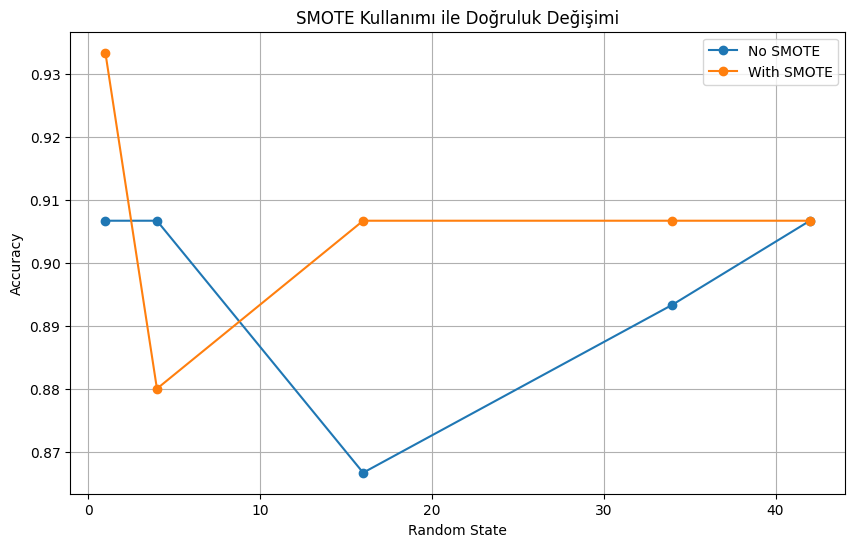

In [605]:
# Random state listesi
random_states = [1, 4, 16, 34, 42]

# SonuÃ§larÄ± tutmak iÃ§in listeler
results_no_smote = []
results_with_smote = []

# DÃ¶ngÃ¼ baÅŸlat
for state in random_states:
    print(f"\n--- RANDOM STATE: {state} ---")
    
    # 1. SMOTE OLMADAN MODEL
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state, stratify=y)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_no_smote = accuracy_score(y_test, y_pred)
    results_no_smote.append(acc_no_smote)
    
    print(f"SMOTE OLMADAN DoÄŸruluk: {acc_no_smote:.4f}")
    
    # 2. SMOTE UYGULANARAK MODEL
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test)
    acc_with_smote = accuracy_score(y_test, y_pred_smote)
    results_with_smote.append(acc_with_smote)
    
    print(f"SMOTE ile     DoÄŸruluk: {acc_with_smote:.4f}")

# SonuÃ§larÄ± tablo olarak gÃ¶ster
df_results = pd.DataFrame({
    'Random State': random_states,
    'Accuracy (No SMOTE)': results_no_smote,
    'Accuracy (With SMOTE)': results_with_smote
})

print("\n--- DOÄžRULUK KARÅžILAÅžTIRMASI ---")
print(df_results)

# Ä°stersen grafikle de gÃ¶sterebiliriz
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(random_states, results_no_smote, marker='o', label='No SMOTE')
plt.plot(random_states, results_with_smote, marker='o', label='With SMOTE')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('SMOTE KullanÄ±mÄ± ile DoÄŸruluk DeÄŸiÅŸimi')
plt.legend()
plt.grid(True)
plt.show()


=== RANDOM STATE: 1 ===
SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): 0.9067


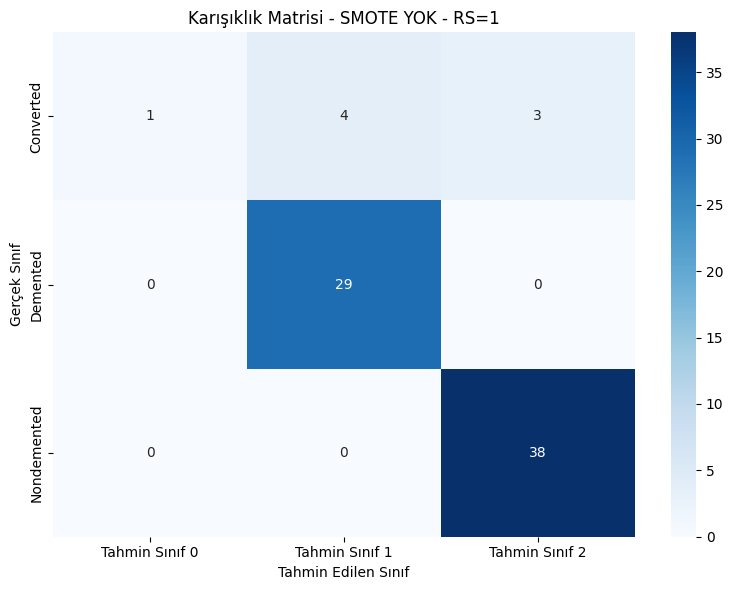

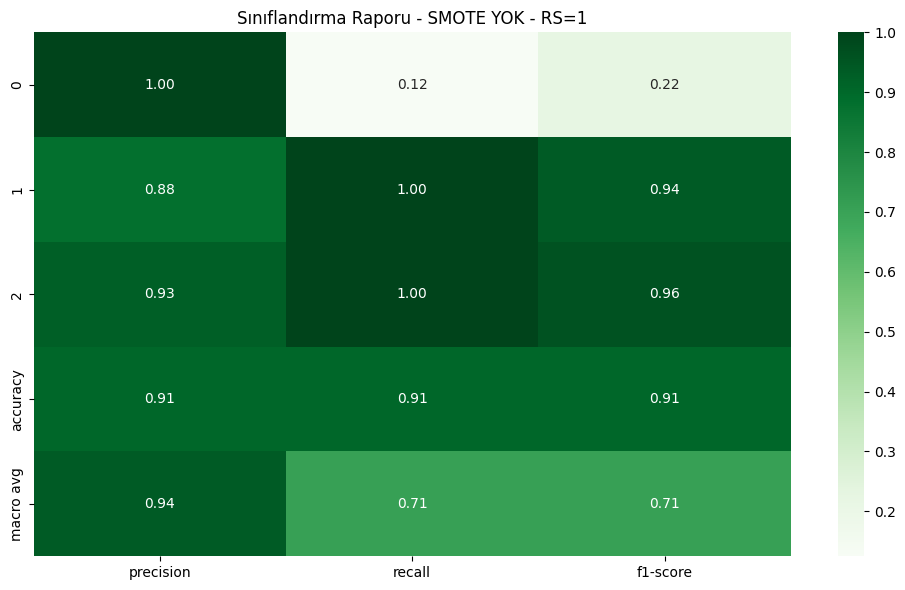

SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): 0.9333


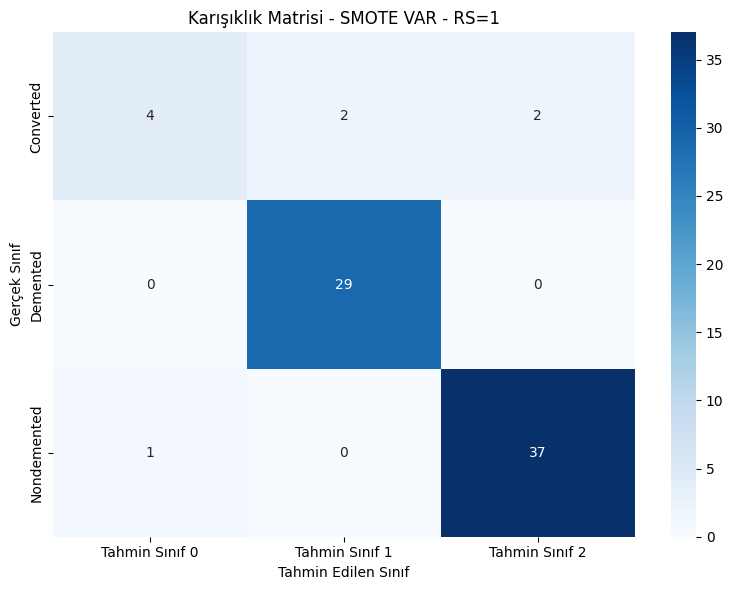

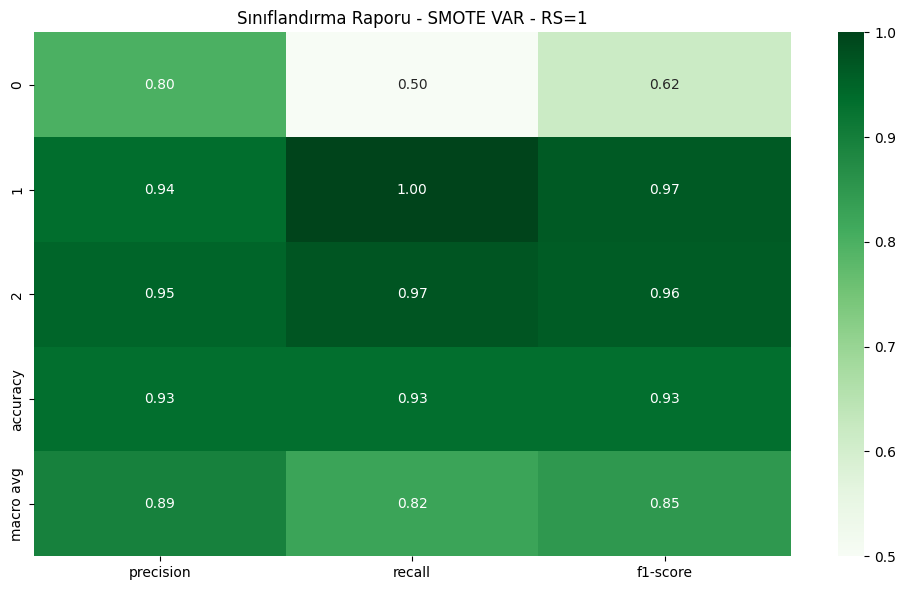


=== RANDOM STATE: 4 ===
SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): 0.9067


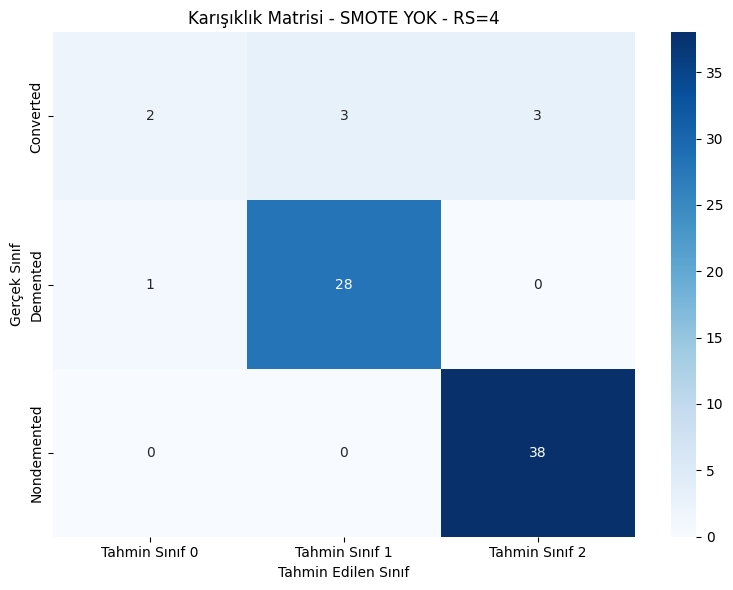

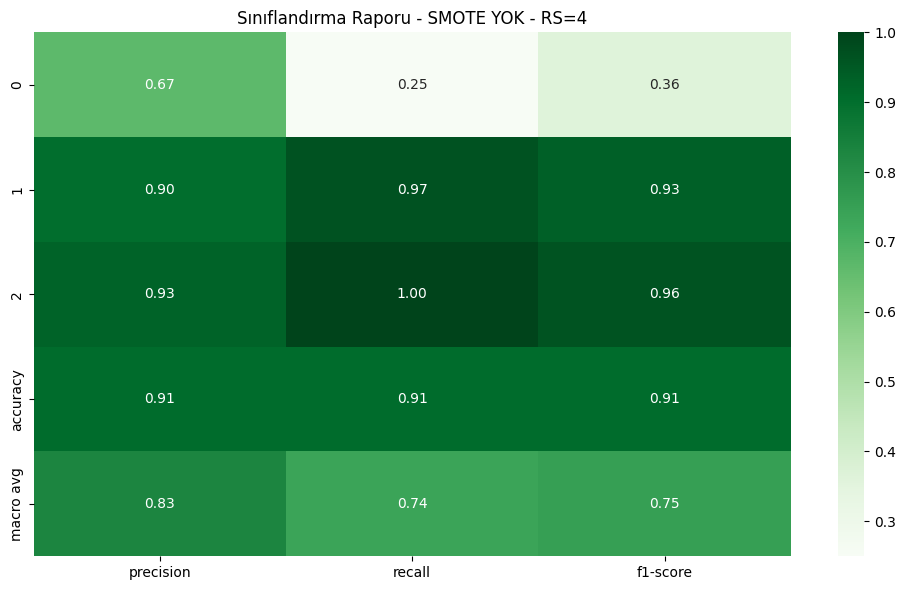

SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): 0.8800


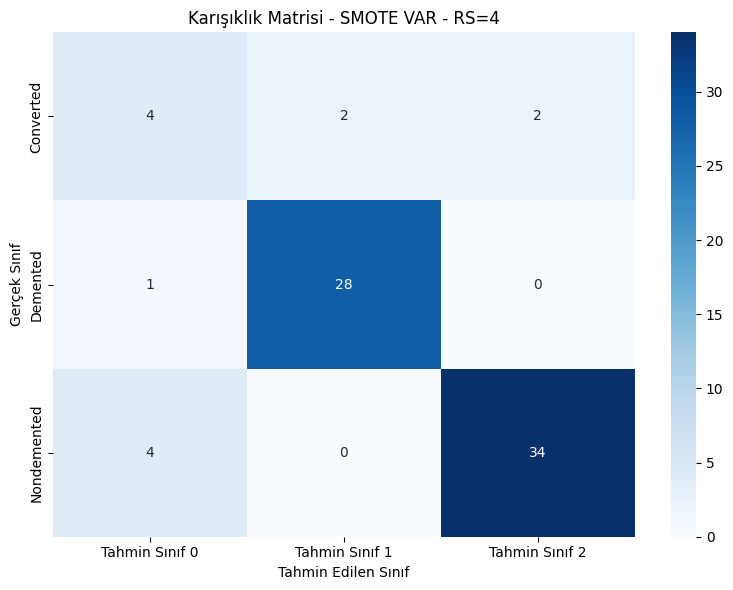

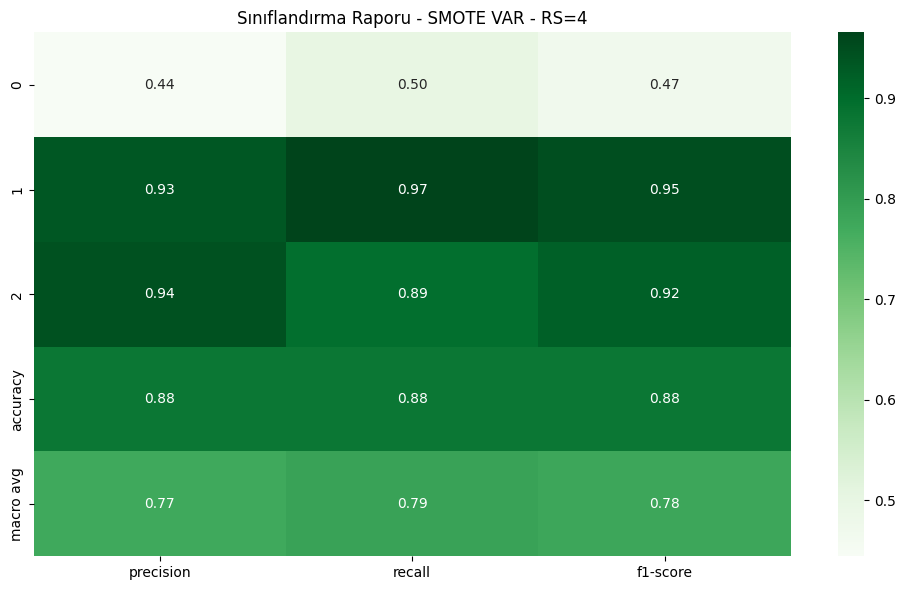


=== RANDOM STATE: 16 ===
SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): 0.8667


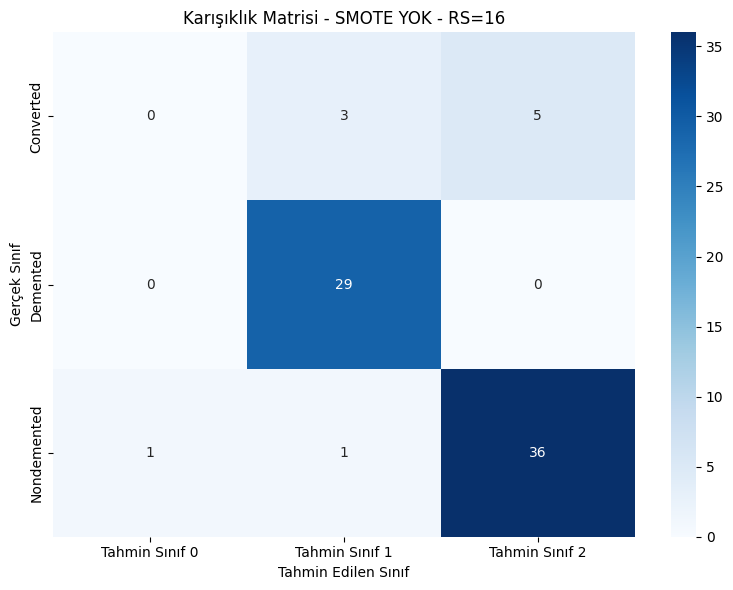

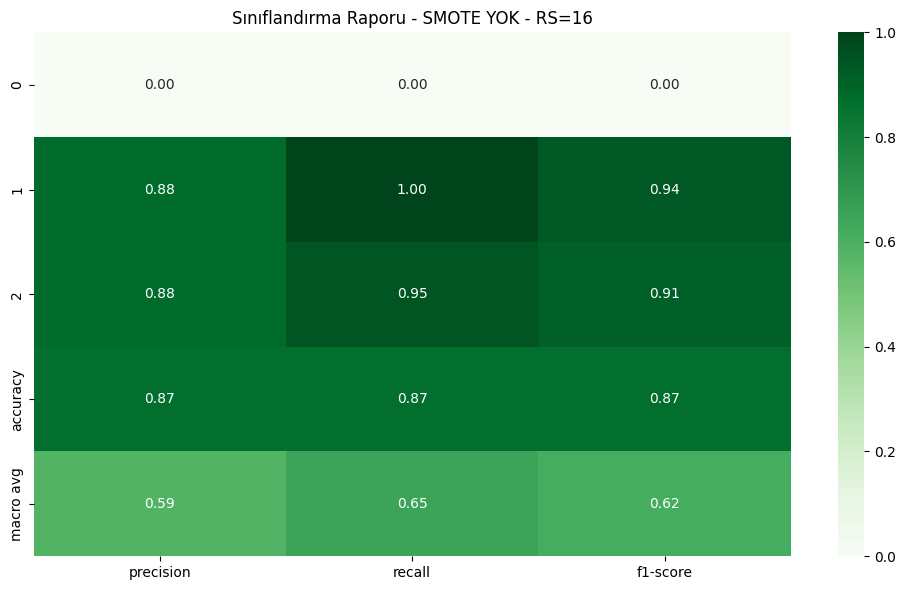

SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): 0.9067


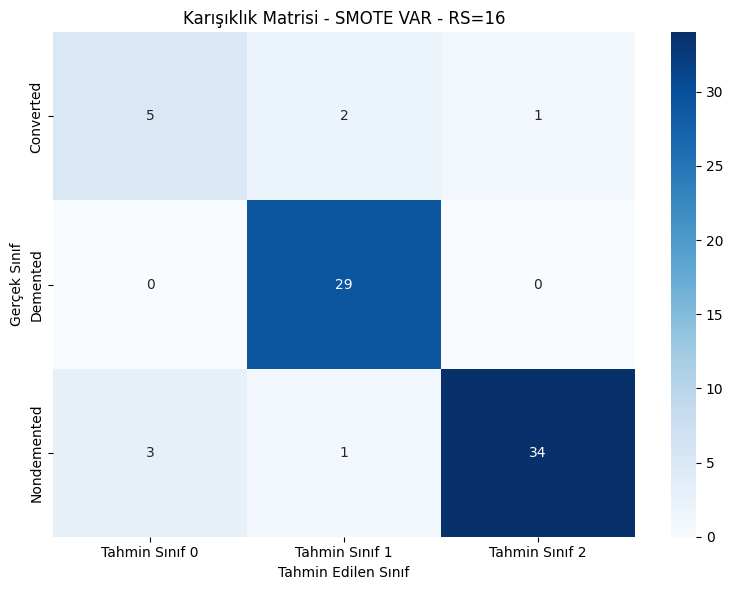

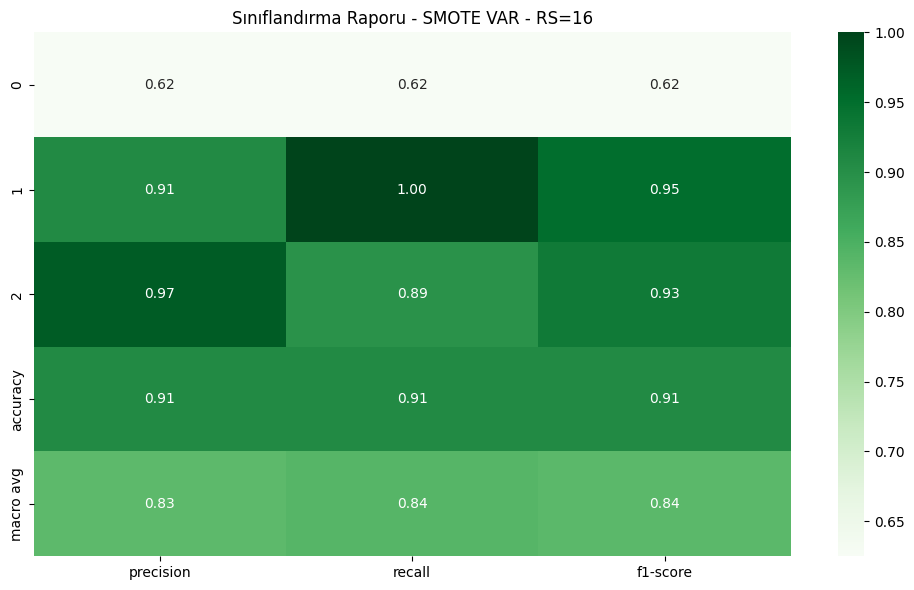


=== RANDOM STATE: 34 ===
SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): 0.8933


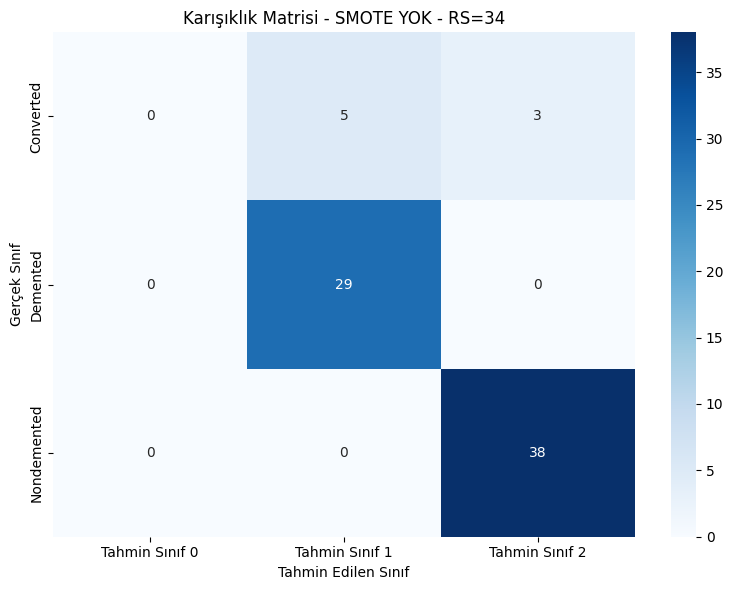

C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cagin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

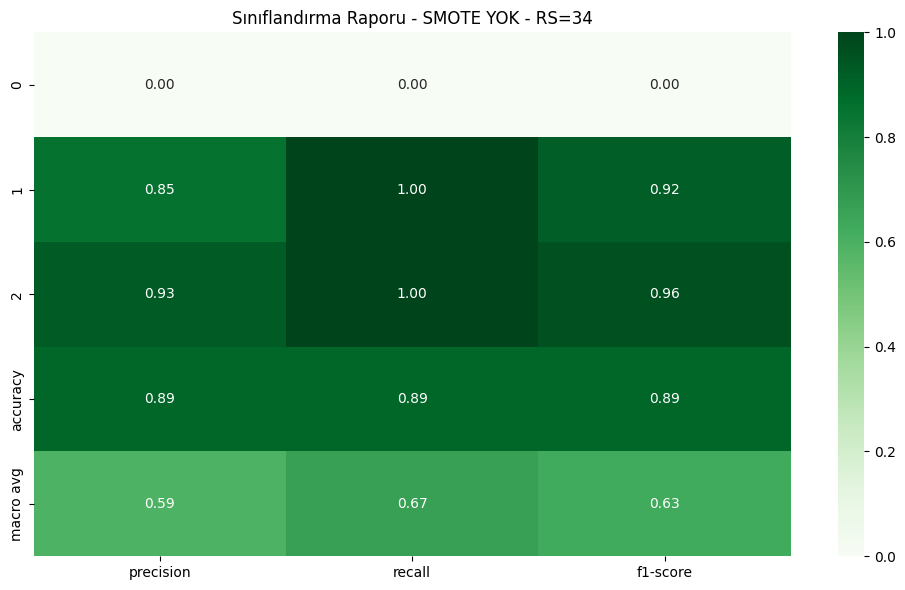

SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): 0.9067


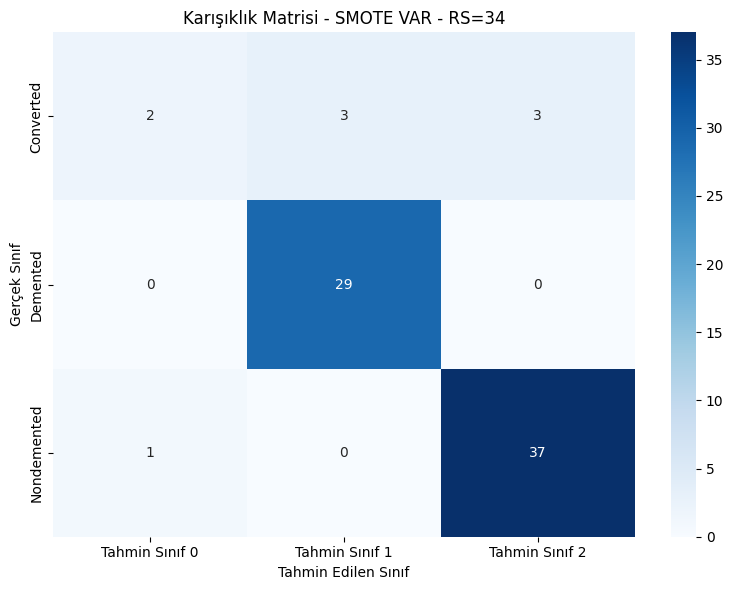

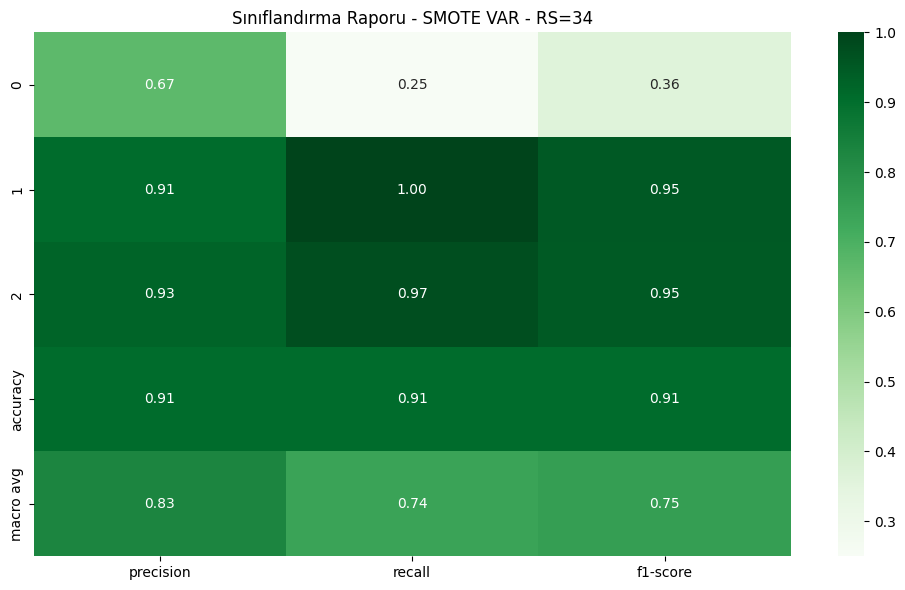


=== RANDOM STATE: 42 ===
SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): 0.9067


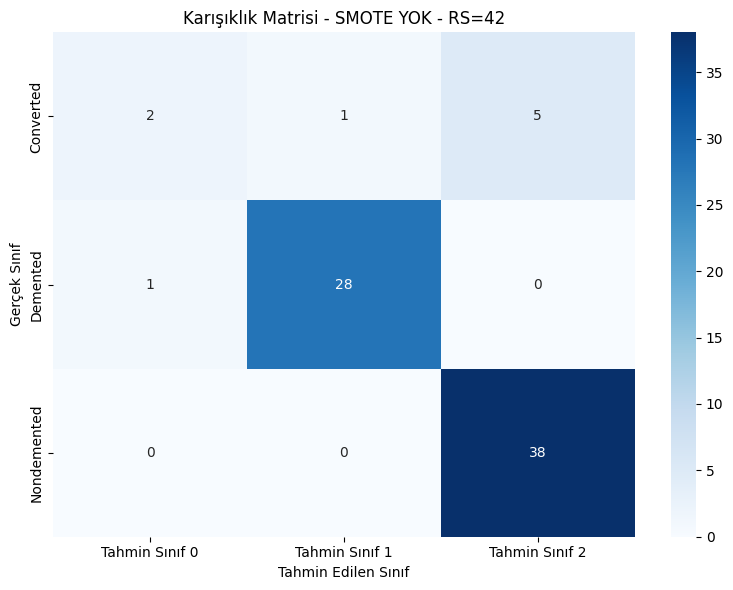

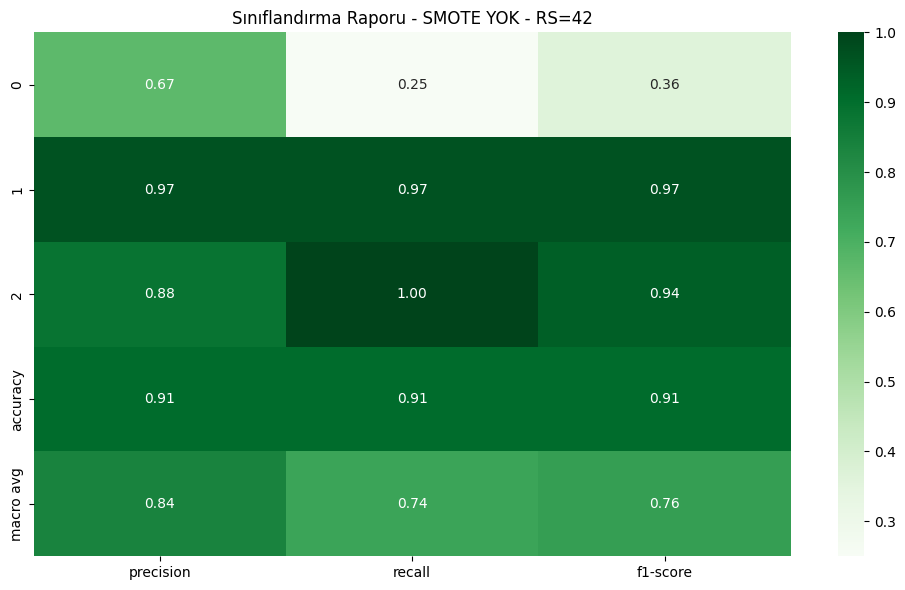

SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): 0.9067


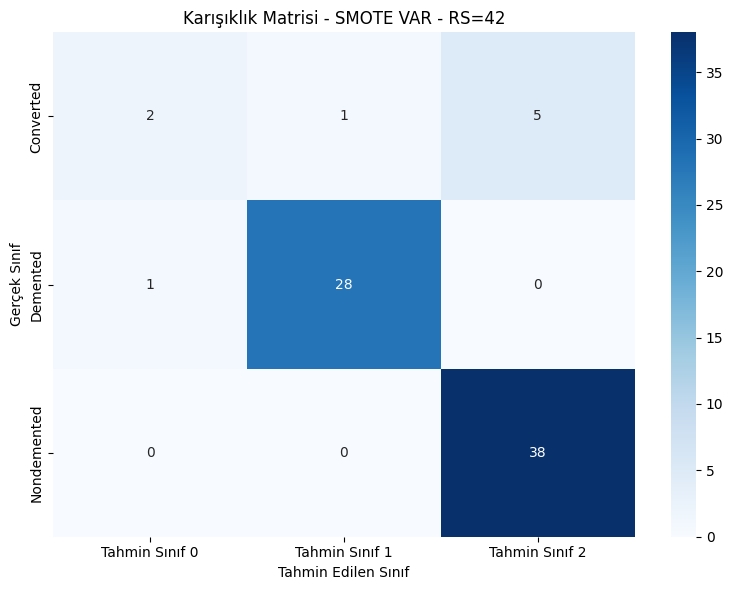

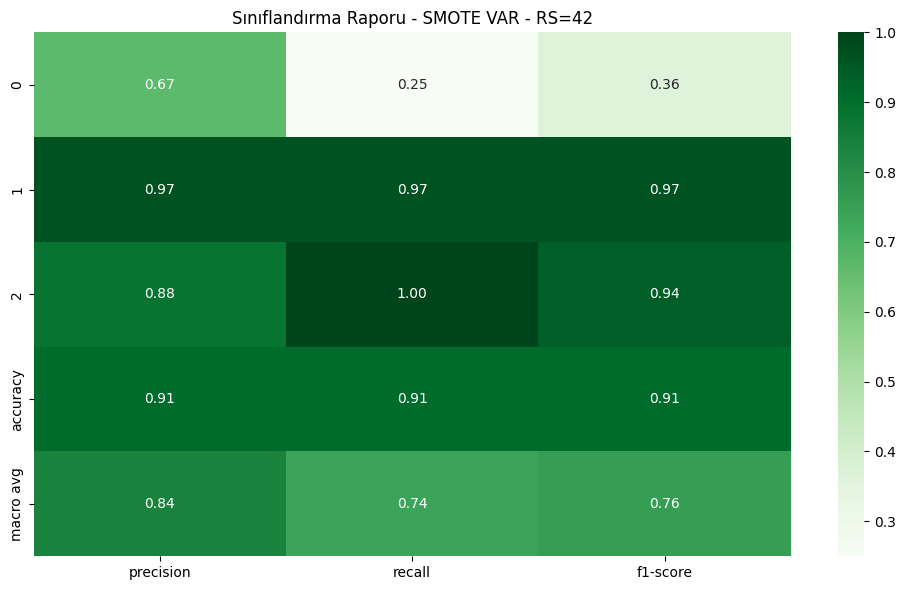


--- DOÄžRULUK ORANI KARÅžILAÅžTIRMASI ---
   Random State  Accuracy (No SMOTE)  Accuracy (With SMOTE)
0             1             0.906667               0.933333
1             4             0.906667               0.880000
2            16             0.866667               0.906667
3            34             0.893333               0.906667
4            42             0.906667               0.906667


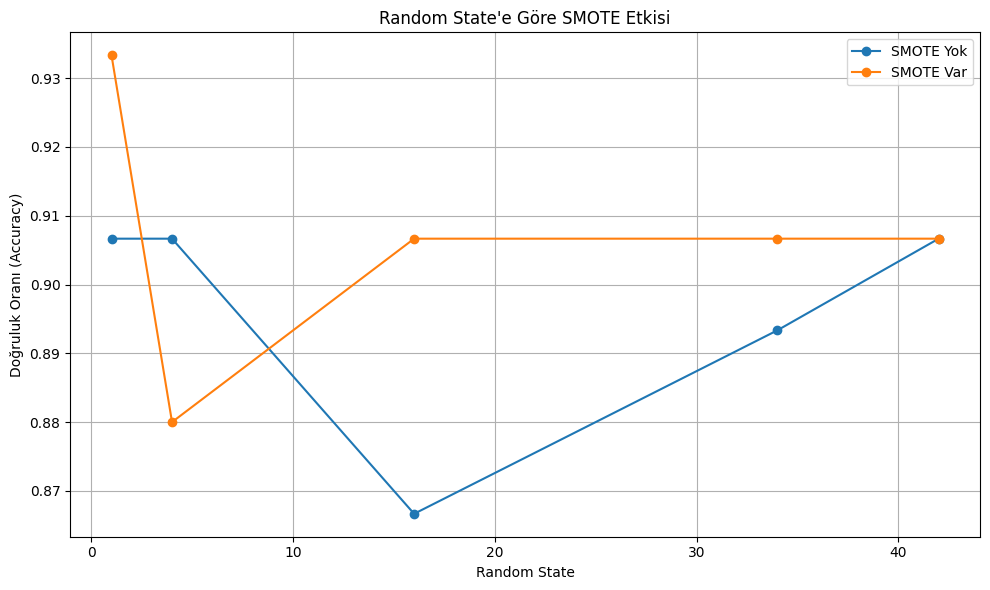

In [606]:
# Random state listesi
random_states = [1, 4, 16, 34, 42]

# SonuÃ§larÄ± saklamak iÃ§in
results_no_smote = []
results_with_smote = []

# SÄ±nÄ±f adlarÄ± (etiketler)
class_names = ['Converted', 'Demented', 'Nondemented']
tick_labels = ['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2']

for state in random_states:
    print(f"\n=== RANDOM STATE: {state} ===")

    # --- SMOTE OLMADAN ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=state, stratify=y)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc_no_smote = accuracy_score(y_test, y_pred)
    results_no_smote.append(acc_no_smote)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"SMOTE OLMADAN DoÄŸruluk OranÄ± (Accuracy): {acc_no_smote:.4f}")
    
    # KarÄ±ÅŸÄ±klÄ±k Matrisi (SMOTE OLMADAN)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=tick_labels, yticklabels=class_names)
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")
    plt.title(f"KarÄ±ÅŸÄ±klÄ±k Matrisi - SMOTE YOK - RS={state}")
    plt.tight_layout()
    plt.show()
    
    # SÄ±nÄ±flandÄ±rma Raporu (SMOTE OLMADAN)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
    plt.title(f"SÄ±nÄ±flandÄ±rma Raporu - SMOTE YOK - RS={state}")
    plt.tight_layout()
    plt.show()

    # --- SMOTE UYGULANARAK ---
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test)

    acc_with_smote = accuracy_score(y_test, y_pred_smote)
    results_with_smote.append(acc_with_smote)
    cm_smote = confusion_matrix(y_test, y_pred_smote)

    print(f"SMOTE ile     DoÄŸruluk OranÄ± (Accuracy): {acc_with_smote:.4f}")
    
    # KarÄ±ÅŸÄ±klÄ±k Matrisi (SMOTE Ä°LE)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues",
                xticklabels=tick_labels, yticklabels=class_names)
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")
    plt.title(f"KarÄ±ÅŸÄ±klÄ±k Matrisi - SMOTE VAR - RS={state}")
    plt.tight_layout()
    plt.show()

    # SÄ±nÄ±flandÄ±rma Raporu (SMOTE Ä°LE)
    report_dict_smote = classification_report(y_test, y_pred_smote, output_dict=True)
    report_df_smote = pd.DataFrame(report_dict_smote).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df_smote.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
    plt.title(f"SÄ±nÄ±flandÄ±rma Raporu - SMOTE VAR - RS={state}")
    plt.tight_layout()
    plt.show()

# SONUÃ‡LARI TABLODA GÃ–STER
df_results = pd.DataFrame({
    'Random State': random_states,
    'Accuracy (No SMOTE)': results_no_smote,
    'Accuracy (With SMOTE)': results_with_smote
})

print("\n--- DOÄžRULUK ORANI KARÅžILAÅžTIRMASI ---")
print(df_results)

# SONUÃ‡LARI GRAFÄ°KLE GÃ–STER
plt.figure(figsize=(10, 6))
plt.plot(random_states, results_no_smote, marker='o', label='SMOTE Yok')
plt.plot(random_states, results_with_smote, marker='o', label='SMOTE Var')
plt.xlabel("Random State")
plt.ylabel("DoÄŸruluk OranÄ± (Accuracy)")
plt.title("Random State'e GÃ¶re SMOTE Etkisi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Claude.ai


--- Random State = 1 (SMOTE Olmadan) ---
DoÄŸruluk OranÄ±: 0.9067
KarÄ±ÅŸÄ±klÄ±k Matrisi:
[[ 1  1  6]
 [ 0 24  0]
 [ 0  0 43]]
SÄ±nÄ±flandÄ±rma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.96      1.00      0.98        24
           2       0.88      1.00      0.93        43

    accuracy                           0.91        75
   macro avg       0.95      0.71      0.71        75
weighted avg       0.92      0.91      0.87        75


--- Random State = 1 (SMOTE Ä°le) ---
DoÄŸruluk OranÄ±: 0.8667
KarÄ±ÅŸÄ±klÄ±k Matrisi:
[[ 0  2  6]
 [ 0 24  0]
 [ 2  0 41]]
SÄ±nÄ±flandÄ±rma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96        24
           2       0.87      0.95      0.91        43

    accuracy                           0.87        75
   macro avg       0.60      0.65      0.62 

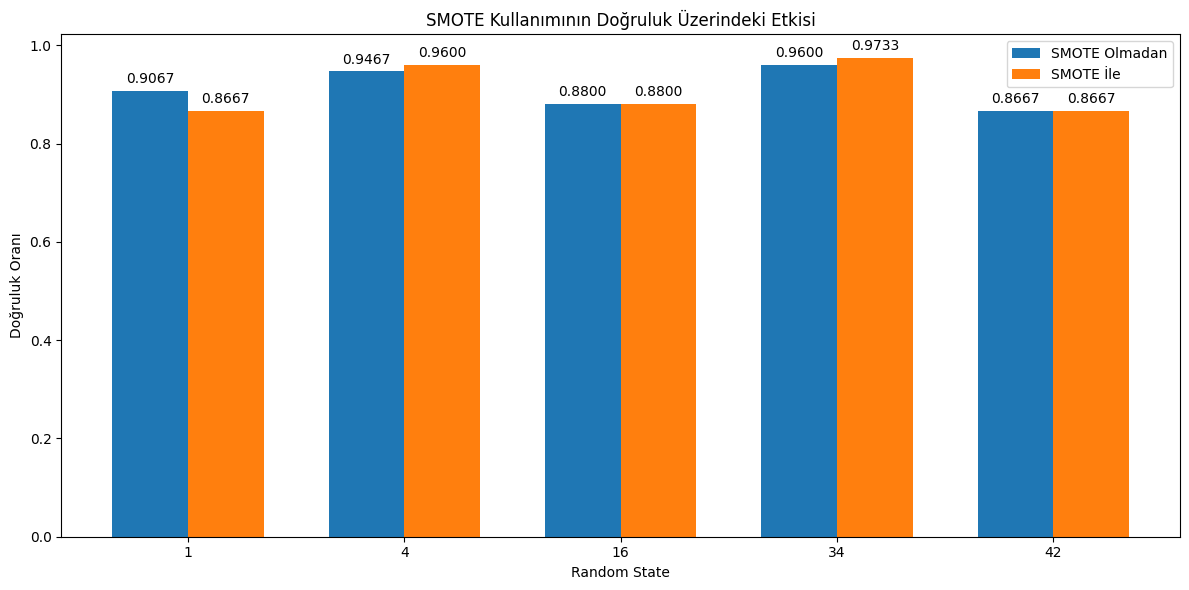

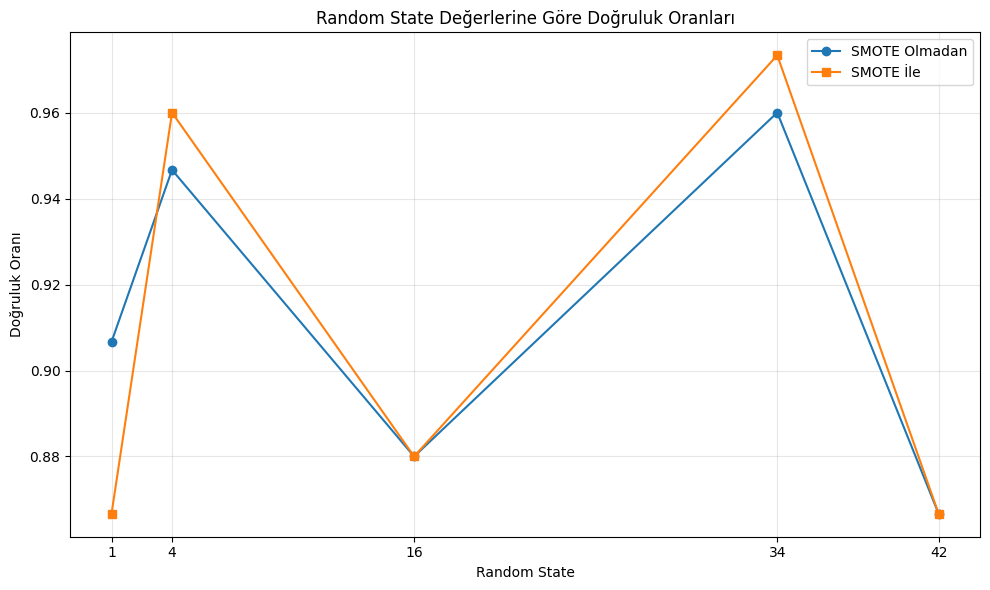

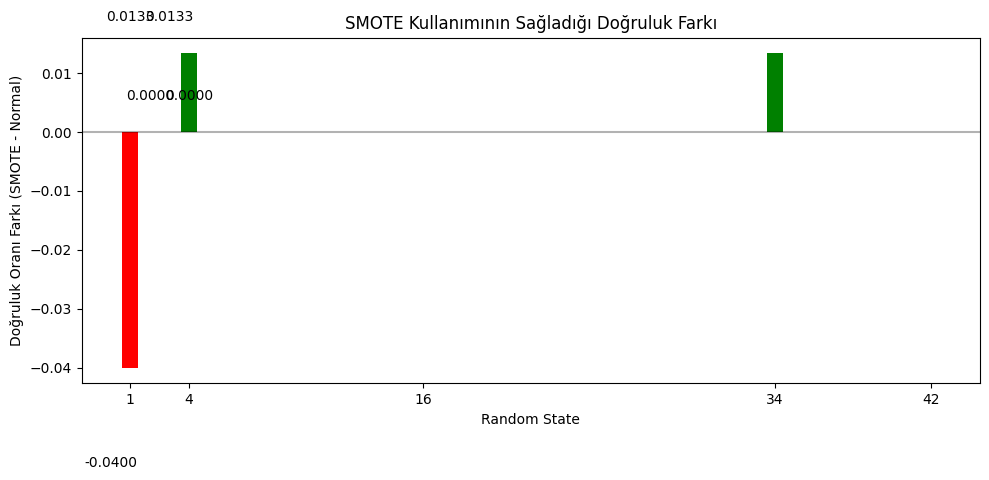

In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Random state deÄŸerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# SonuÃ§larÄ± saklayacaÄŸÄ±mÄ±z sÃ¶zlÃ¼kler
accuracy_normal = {}
accuracy_smote = {}

# Her random_state iÃ§in normal ve SMOTE kullanarak doÄŸruluk hesaplama
for rs in random_states:
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy_normal[rs] = accuracy_score(y_test, y_pred)
    
    print(f"\n--- Random State = {rs} (SMOTE Olmadan) ---")
    print(f"DoÄŸruluk OranÄ±: {accuracy_normal[rs]:.4f}")
    print("KarÄ±ÅŸÄ±klÄ±k Matrisi:")
    print(confusion_matrix(y_test, y_pred))
    print("SÄ±nÄ±flandÄ±rma Raporu:")
    print(classification_report(y_test, y_pred))
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eÄŸitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy_smote[rs] = accuracy_score(y_test, y_pred)
    
    print(f"\n--- Random State = {rs} (SMOTE Ä°le) ---")
    print(f"DoÄŸruluk OranÄ±: {accuracy_smote[rs]:.4f}")
    print("KarÄ±ÅŸÄ±klÄ±k Matrisi:")
    print(confusion_matrix(y_test, y_pred))
    print("SÄ±nÄ±flandÄ±rma Raporu:")
    print(classification_report(y_test, y_pred))

# SonuÃ§larÄ± karÅŸÄ±laÅŸtÄ±rma tablosu
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal DoÄŸruluk': [accuracy_normal[rs] for rs in random_states],
    'SMOTE DoÄŸruluk': [accuracy_smote[rs] for rs in random_states],
    'Fark': [accuracy_smote[rs] - accuracy_normal[rs] for rs in random_states]
})

print("\n--- KARÅžILAÅžTIRMA TABLOSU ---")
print(comparison_df)

# GÃ¶rselleÅŸtirme
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal DoÄŸruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE DoÄŸruluk'], bar_width, label='SMOTE Ä°le')

plt.xlabel('Random State')
plt.ylabel('DoÄŸruluk OranÄ±')
plt.title('SMOTE KullanÄ±mÄ±nÄ±n DoÄŸruluk Ãœzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# DeÄŸerleri Ã§ubuklarÄ±n Ã¼zerinde gÃ¶sterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# Ã‡izgi grafiÄŸi ile karÅŸÄ±laÅŸtÄ±rma
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal DoÄŸruluk'], 'o-', label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE DoÄŸruluk'], 's-', label='SMOTE Ä°le')
plt.xlabel('Random State')
plt.ylabel('DoÄŸruluk OranÄ±')
plt.title('Random State DeÄŸerlerine GÃ¶re DoÄŸruluk OranlarÄ±')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# DoÄŸruluk oranÄ± farkÄ±nÄ±n grafiÄŸi
plt.figure(figsize=(10, 5))
colors = ['green' if x > 0 else 'red' for x in comparison_df['Fark']]
plt.bar(random_states, comparison_df['Fark'], color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Random State')
plt.ylabel('DoÄŸruluk OranÄ± FarkÄ± (SMOTE - Normal)')
plt.title('SMOTE KullanÄ±mÄ±nÄ±n SaÄŸladÄ±ÄŸÄ± DoÄŸruluk FarkÄ±')
plt.xticks(random_states)

# DeÄŸerleri Ã§ubuklarÄ±n Ã¼zerinde gÃ¶sterme
for i, v in enumerate(comparison_df['Fark']):
    plt.text(i, v + (0.005 if v >= 0 else -0.015), 
             f'{v:.4f}', ha='center', 
             va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Random state deÄŸerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# SonuÃ§larÄ± saklayacaÄŸÄ±mÄ±z sÃ¶zlÃ¼kler
results_normal = {}
results_smote = {}

# Her random_state iÃ§in normal ve SMOTE kullanarak doÄŸruluk hesaplama
for rs in random_states:
    print(f"\n{'='*50}")
    print(f"RANDOM STATE = {rs}")
    print(f"{'='*50}")
    
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_normal[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE OLMADAN ---")
    print(f"Model DoÄŸruluÄŸu (Accuracy): {accuracy:.4f}")
    print(f"\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):")
    print(cr)
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eÄŸitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_smote[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE Ä°LE ---")
    print(f"Model DoÄŸruluÄŸu (Accuracy): {accuracy:.4f}")
    print(f"\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):")
    print(cr)

# KarÅŸÄ±laÅŸtÄ±rma tablosu iÃ§in doÄŸruluk deÄŸerlerini toplama
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal DoÄŸruluk': [results_normal[rs]['accuracy'] for rs in random_states],
    'SMOTE DoÄŸruluk': [results_smote[rs]['accuracy'] for rs in random_states],
    'Fark': [results_smote[rs]['accuracy'] - results_normal[rs]['accuracy'] for rs in random_states]
})

print("\n\n")
print("="*70)
print("DOÄžRULUK KARÅžILAÅžTIRMA TABLOSU")
print("="*70)
print(comparison_df)
print("\n")

# DoÄŸruluk deÄŸerlerinin gÃ¶rselleÅŸtirilmesi
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal DoÄŸruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE DoÄŸruluk'], bar_width, label='SMOTE Ä°le')

plt.xlabel('Random State')
plt.ylabel('Model DoÄŸruluÄŸu (Accuracy)')
plt.title('SMOTE KullanÄ±mÄ±nÄ±n Model DoÄŸruluÄŸu Ãœzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# DeÄŸerleri Ã§ubuklarÄ±n Ã¼zerinde gÃ¶sterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# TÃ¼m karÄ±ÅŸÄ±klÄ±k matrislerinin gÃ¶rselleÅŸtirilmesi
plt.figure(figsize=(16, 12))

for i, rs in enumerate(random_states):
    # Normal model confusion matrix
    plt.subplot(5, 2, 2*i+1)
    sns.heatmap(results_normal[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], 
                yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
    plt.title(f"Normal Model, RS={rs}, Accuracy={results_normal[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")
    
    # SMOTE model confusion matrix
    plt.subplot(5, 2, 2*i+2)
    sns.heatmap(results_smote[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], 
                yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
    plt.title(f"SMOTE Model, RS={rs}, Accuracy={results_smote[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")

plt.tight_layout()
plt.show()

# DoÄŸruluk oranÄ± karÅŸÄ±laÅŸtÄ±rma grafiÄŸi
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal DoÄŸruluk'], 'o-', linewidth=2, markersize=8, label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE DoÄŸruluk'], 's-', linewidth=2, markersize=8, label='SMOTE Ä°le')
plt.xlabel('Random State')
plt.ylabel('Model DoÄŸruluÄŸu (Accuracy)')
plt.title('Random State DeÄŸerlerine GÃ¶re Model DoÄŸruluklarÄ±')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)

# DeÄŸerleri noktalarÄ±n Ã¼zerinde gÃ¶sterme
for i, rs in enumerate(random_states):
    plt.text(rs, comparison_df['Normal DoÄŸruluk'][i] + 0.01, f"{comparison_df['Normal DoÄŸruluk'][i]:.4f}", 
             ha='center', va='bottom')
    plt.text(rs, comparison_df['SMOTE DoÄŸruluk'][i] - 0.01, f"{comparison_df['SMOTE DoÄŸruluk'][i]:.4f}", 
             ha='center', va='top')

plt.tight_layout()
plt.show()import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Random state deÄŸerlerini belirleyin
random_states = [1, 4, 16, 34, 42]

# SonuÃ§larÄ± saklayacaÄŸÄ±mÄ±z sÃ¶zlÃ¼kler
results_normal = {}
results_smote = {}

# Her random_state iÃ§in normal ve SMOTE kullanarak doÄŸruluk hesaplama
for rs in random_states:
    print(f"\n{'='*50}")
    print(f"RANDOM STATE = {rs}")
    print(f"{'='*50}")
    
    # Normal model (SMOTE olmadan)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_normal[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE OLMADAN ---")
    print(f"Model DoÄŸruluÄŸu (Accuracy): {accuracy:.4f}")
    print(f"\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):")
    print(cr)
    
    # SMOTE ile model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Sadece eÄŸitim verilerine SMOTE uygulama
    smote = SMOTE(random_state=rs)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rs)
    rf_classifier.fit(X_train_smote, y_train_smote)
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results_smote[rs] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(f"\n--- SMOTE Ä°LE ---")
    print(f"Model DoÄŸruluÄŸu (Accuracy): {accuracy:.4f}")
    print(f"\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):")
    print(cm)
    print(f"\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):")
    print(cr)

# KarÅŸÄ±laÅŸtÄ±rma tablosu iÃ§in doÄŸruluk deÄŸerlerini toplama
comparison_df = pd.DataFrame({
    'Random State': random_states,
    'Normal DoÄŸruluk': [results_normal[rs]['accuracy'] for rs in random_states],
    'SMOTE DoÄŸruluk': [results_smote[rs]['accuracy'] for rs in random_states],
    'Fark': [results_smote[rs]['accuracy'] - results_normal[rs]['accuracy'] for rs in random_states]
})

print("\n\n")
print("="*70)
print("DOÄžRULUK KARÅžILAÅžTIRMA TABLOSU")
print("="*70)
print(comparison_df)
print("\n")

# DoÄŸruluk deÄŸerlerinin gÃ¶rselleÅŸtirilmesi
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_states))

bar1 = plt.bar(index, comparison_df['Normal DoÄŸruluk'], bar_width, label='SMOTE Olmadan')
bar2 = plt.bar(index + bar_width, comparison_df['SMOTE DoÄŸruluk'], bar_width, label='SMOTE Ä°le')

plt.xlabel('Random State')
plt.ylabel('Model DoÄŸruluÄŸu (Accuracy)')
plt.title('SMOTE KullanÄ±mÄ±nÄ±n Model DoÄŸruluÄŸu Ãœzerindeki Etkisi')
plt.xticks(index + bar_width/2, random_states)
plt.legend()

# DeÄŸerleri Ã§ubuklarÄ±n Ã¼zerinde gÃ¶sterme
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()

# TÃ¼m karÄ±ÅŸÄ±klÄ±k matrislerinin gÃ¶rselleÅŸtirilmesi
plt.figure(figsize=(16, 12))

for i, rs in enumerate(random_states):
    # Normal model confusion matrix
    plt.subplot(5, 2, 2*i+1)
    sns.heatmap(results_normal[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], 
                yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
    plt.title(f"Normal Model, RS={rs}, Accuracy={results_normal[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")
    
    # SMOTE model confusion matrix
    plt.subplot(5, 2, 2*i+2)
    sns.heatmap(results_smote[rs]['confusion_matrix'], annot=True, fmt="d", cmap="Blues", 
                xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], 
                yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
    plt.title(f"SMOTE Model, RS={rs}, Accuracy={results_smote[rs]['accuracy']:.4f}")
    plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
    plt.ylabel("GerÃ§ek SÄ±nÄ±f")

plt.tight_layout()
plt.show()

# DoÄŸruluk oranÄ± karÅŸÄ±laÅŸtÄ±rma grafiÄŸi
plt.figure(figsize=(10, 6))
plt.plot(random_states, comparison_df['Normal DoÄŸruluk'], 'o-', linewidth=2, markersize=8, label='SMOTE Olmadan')
plt.plot(random_states, comparison_df['SMOTE DoÄŸruluk'], 's-', linewidth=2, markersize=8, label='SMOTE Ä°le')
plt.xlabel('Random State')
plt.ylabel('Model DoÄŸruluÄŸu (Accuracy)')
plt.title('Random State DeÄŸerlerine GÃ¶re Model DoÄŸruluklarÄ±')
plt.xticks(random_states)
plt.legend()
plt.grid(True, alpha=0.3)

# DeÄŸerleri noktalarÄ±n Ã¼zerinde gÃ¶sterme
for i, rs in enumerate(random_states):
    plt.text(rs, comparison_df['Normal DoÄŸruluk'][i] + 0.01, f"{comparison_df['Normal DoÄŸruluk'][i]:.4f}", 
             ha='center', va='bottom')
    plt.text(rs, comparison_df['SMOTE DoÄŸruluk'][i] - 0.01, f"{comparison_df['SMOTE DoÄŸruluk'][i]:.4f}", 
             ha='center', va='top')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2214397014.py, line 161)

In [ ]:
# RANDOM STATE belirle
random_state = 41

# 1. Veriyi eÄŸitim ve test olarak ayÄ±r (henÃ¼z SMOTE uygulama)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

# 2. SMOTE OLMADAN model
rf_no_smote = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_no_smote.fit(X_train, y_train)
y_pred_no_smote = rf_no_smote.predict(X_test)

acc_no_smote = accuracy_score(y_test, y_pred_no_smote)
print("SMOTE OLMADAN DoÄŸruluk:", acc_no_smote)
print(classification_report(y_test, y_pred_no_smote))

# 3. SMOTE uygulayarak eÄŸitim verisini dengele
smote = SMOTE(random_state=random_state)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. SMOTEâ€™LÄ° model
rf_with_smote = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_with_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_with_smote.predict(X_test)

acc_with_smote = accuracy_score(y_test, y_pred_smote)
print("SMOTE Ä°LE DoÄŸruluk:", acc_with_smote)
print(classification_report(y_test, y_pred_smote))

# 5. DoÄŸruluk karÅŸÄ±laÅŸtÄ±rmasÄ±
comparison_df = pd.DataFrame({
    'Model': ['SMOTEâ€™siz', 'SMOTEâ€™li'],
    'Accuracy': [acc_no_smote, acc_with_smote]
})
print("\nDoÄŸruluk KarÅŸÄ±laÅŸtÄ±rma Tablosu:")
print(comparison_df)

# 6. Grafikle karÅŸÄ±laÅŸtÄ±rma
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison_df, x='Model', y='Accuracy', palette='Set2')
plt.title('SMOTE KullanÄ±mÄ±nÄ±n Model PerformansÄ±na Etkisi')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()